In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

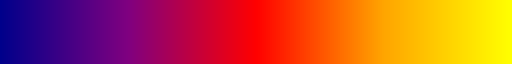

In [2]:
sns.blend_palette(['darkblue','purple','red','orange','yellow'],12,as_cmap=True)

In [3]:
Rp=sns.blend_palette(['darkblue','purple','red','orange','yellow'],12)

In [4]:
Rp

[(0.0, 0.0, 0.5450980392156862),
 (0.18109957708573626, 0.0, 0.5295347943098808),
 (0.3621991541714725, 0.0, 0.5139715494040753),
 (0.5429757785467128, 0.0, 0.46062283737024223),
 (0.730472895040369, 0.0, 0.2716493656286044),
 (0.910157631680123, 0.0, 0.09054978854286816),
 (1.0, 0.11672433679354095, 0.0),
 (1.0, 0.3501730103806228, 0.0),
 (1.0, 0.5937716262975778, 0.0),
 (1.0, 0.7453287197231834, 0.0),
 (1.0, 0.8726643598615917, 0.0),
 (1.0, 1.0, 0.0)]

In [5]:
download_root = 'https://raw.githubusercontent.com/CristianRiveraEsparza/MyBDCRE/main/'
airbnb = 'AirBnB/listings.csv'
df = pd.read_csv(download_root + airbnb)

In [6]:
df.head(3)

id                               name  host_id host_name  \
0  35797                        Villa Dante   153786      Dici   
1  44616                       Condesa Haus   196253  Fernando   
2  67703  2 bedroom apt. deco bldg, Condesa   334451  Nicholas   

   neighbourhood_group          neighbourhood  latitude  longitude  \
0                  NaN  Cuajimalpa de Morelos  19.38382  -99.27334   
1                  NaN             Cuauhtémoc  19.41162  -99.17794   
2                  NaN             Cuauhtémoc  19.41152  -99.16857   

         room_type   price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt  3865.0               1                  0         NaN   
1  Entire home/apt     NaN               1                 64  2023-03-26   
2  Entire home/apt  2029.0               2                 49  2024-05-05   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0                NaN                               1               363   
1               0.41                               8               325   
2               0.31                               2               325   

   number_of_reviews_ltm  license  
0                      0      NaN  
1                      0      NaN  
2                      4      NaN

In [7]:
df.tail(3)

id                                               name  \
26579  1252218347521498445                     Suite Queen | District Polanco   
26580  1252229157495978163                   Pretty, well centered, amenities   
26581  1252932787720304495  w* | Spectacular Loft w/ Perfect View in Roma ...   

         host_id   host_name  neighbourhood_group   neighbourhood   latitude  \
26579  596009321  Luis Angel                  NaN  Miguel Hidalgo  19.432687   
26580    6522855    Salvador                  NaN  Miguel Hidalgo  19.443476   
26581   16148871        Juan                  NaN      Cuauhtémoc  19.420141   

       longitude        room_type   price  minimum_nights  number_of_reviews  \
26579 -99.197736     Private room  2600.0               1                  0   
26580 -99.201748  Entire home/apt  1353.0               1                  0   
26581 -99.166998  Entire home/apt  1440.0               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
26579         NaN                NaN                              16   
26580         NaN                NaN                               4   
26581         NaN                NaN                             148   

       availability_365  number_of_reviews_ltm  license  
26579               177                      0      NaN  
26580               150                      0      NaN  
26581               365                      0      NaN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26582 non-null  int64  
 1   name                            26582 non-null  object 
 2   host_id                         26582 non-null  int64  
 3   host_name                       26582 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   26582 non-null  object 
 6   latitude                        26582 non-null  float64
 7   longitude                       26582 non-null  float64
 8   room_type                       26582 non-null  object 
 9   price                           23655 non-null  float64
 10  minimum_nights                  26582 non-null  int64  
 11  number_of_reviews               26582 non-null  int64  
 12  last_review                     

In [9]:
df.count()

id                                26582
name                              26582
host_id                           26582
host_name                         26582
neighbourhood_group                   0
neighbourhood                     26582
latitude                          26582
longitude                         26582
room_type                         26582
price                             23655
minimum_nights                    26582
number_of_reviews                 26582
last_review                       22926
reviews_per_month                 22926
calculated_host_listings_count    26582
availability_365                  26582
number_of_reviews_ltm             26582
license                               0
dtype: int64

In [10]:
print(f'Lost data in price row: {df["price"].isna().sum()}, porcent: {df["price"].isna().sum()/df["id"].count()}')
print(f'Lost data in last_review row: {df["last_review"].isna().sum()}, porcent: {df["last_review"].isna().sum()/df["id"].count()}')
print(f'Lost data in reviews_per_month row: {df["reviews_per_month"].isna().sum()}, porcent: {df["reviews_per_month"].isna().sum()/df["id"].count()}')
print(f'Lost data in neighbourhood_group row: {df["neighbourhood_group"].isna().sum()}, porcent: {df["neighbourhood_group"].isna().sum()/df["id"].count()}')
print(f'Lost data in license row: {df["license"].isna().sum()}, porcent: {df["license"].isna().sum()/df["id"].count()}')

Lost data in price row: 2927, porcent: 0.1101121059363479
Lost data in last_review row: 3656, porcent: 0.1375366789556843
Lost data in reviews_per_month row: 3656, porcent: 0.1375366789556843
Lost data in neighbourhood_group row: 26582, porcent: 1.0
Lost data in license row: 26582, porcent: 1.0


In [11]:
df['id'].duplicated().sum()

0

In [12]:
df.drop(columns=['neighbourhood_group','license'], inplace=True)

In [13]:
df[df['price'].isnull()]['neighbourhood'].value_counts()

neighbourhood
Cuauhtémoc                1034
Miguel Hidalgo             476
Benito Juárez              371
Coyoacán                   340
Álvaro Obregón             186
Tlalpan                    136
Cuajimalpa de Morelos       86
Venustiano Carranza         70
Iztapalapa                  57
Iztacalco                   37
Gustavo A. Madero           36
Azcapotzalco                33
La Magdalena Contreras      29
Xochimilco                  23
Tláhuac                      7
Milpa Alta                   6
Name: count, dtype: int64

In [14]:
missing_data = df.isnull()
coincidence = missing_data['last_review'] & missing_data['reviews_per_month']
coincidence.sum()

3656

In [15]:
df['reviews_per_month'].describe()

count    22926.000000
mean         1.741839
std          1.955753
min          0.010000
25%          0.420000
50%          1.160000
75%          2.460000
max         38.670000
Name: reviews_per_month, dtype: float64

In [16]:
df.drop(columns=['last_review','reviews_per_month','number_of_reviews_ltm'], inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26582 non-null  int64  
 1   name                            26582 non-null  object 
 2   host_id                         26582 non-null  int64  
 3   host_name                       26582 non-null  object 
 4   neighbourhood                   26582 non-null  object 
 5   latitude                        26582 non-null  float64
 6   longitude                       26582 non-null  float64
 7   room_type                       26582 non-null  object 
 8   price                           23655 non-null  float64
 9   minimum_nights                  26582 non-null  int64  
 10  number_of_reviews               26582 non-null  int64  
 11  calculated_host_listings_count  26582 non-null  int64  
 12  availability_365                

In [18]:
df = df.dropna(subset=['price'])

In [19]:
df[df['price']==0]['price'].value_counts()

price
0.0    1
Name: count, dtype: int64

In [20]:
df = df.drop(df[df['price'] == 0].index)

In [21]:
df.describe().round(2)

id       host_id  latitude  longitude      price  \
count  2.365400e+04  2.365400e+04  23654.00   23654.00   23654.00   
mean   5.563921e+17  2.192617e+08     19.41     -99.17    1511.71   
std    4.890920e+17  1.860688e+08      0.04       0.03    5059.81   
min    3.579700e+04  7.365000e+03     19.18     -99.34      50.00   
25%    4.165868e+07  5.099941e+07     19.39     -99.18     600.25   
50%    7.052103e+17  1.600126e+08     19.42     -99.17     999.00   
75%    1.005859e+18  3.839779e+08     19.43     -99.15    1564.00   
max    1.252933e+18  6.535037e+08     19.55     -98.97  435481.00   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
count        23654.00           23654.00                        23654.00   
mean             3.77              49.09                           18.25   
std             16.87              77.84                           42.72   
min              1.00               0.00                            1.00   
25%              1.00               4.00                            1.00   
50%              2.00              19.00                            4.00   
75%              2.00              62.00                           12.00   
max            730.00            1282.00                          258.00   

       availability_365  
count          23654.00  
mean             239.17  
std              113.96  
min                0.00  
25%              145.00  
50%              268.00  
75%              343.00  
max              365.00

<ipython-input-22-10cd65291733>:28: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  g = sns.countplot(x='room_type', data=df, palette=Rp, hue='room_type', ax=axes[1, 1],


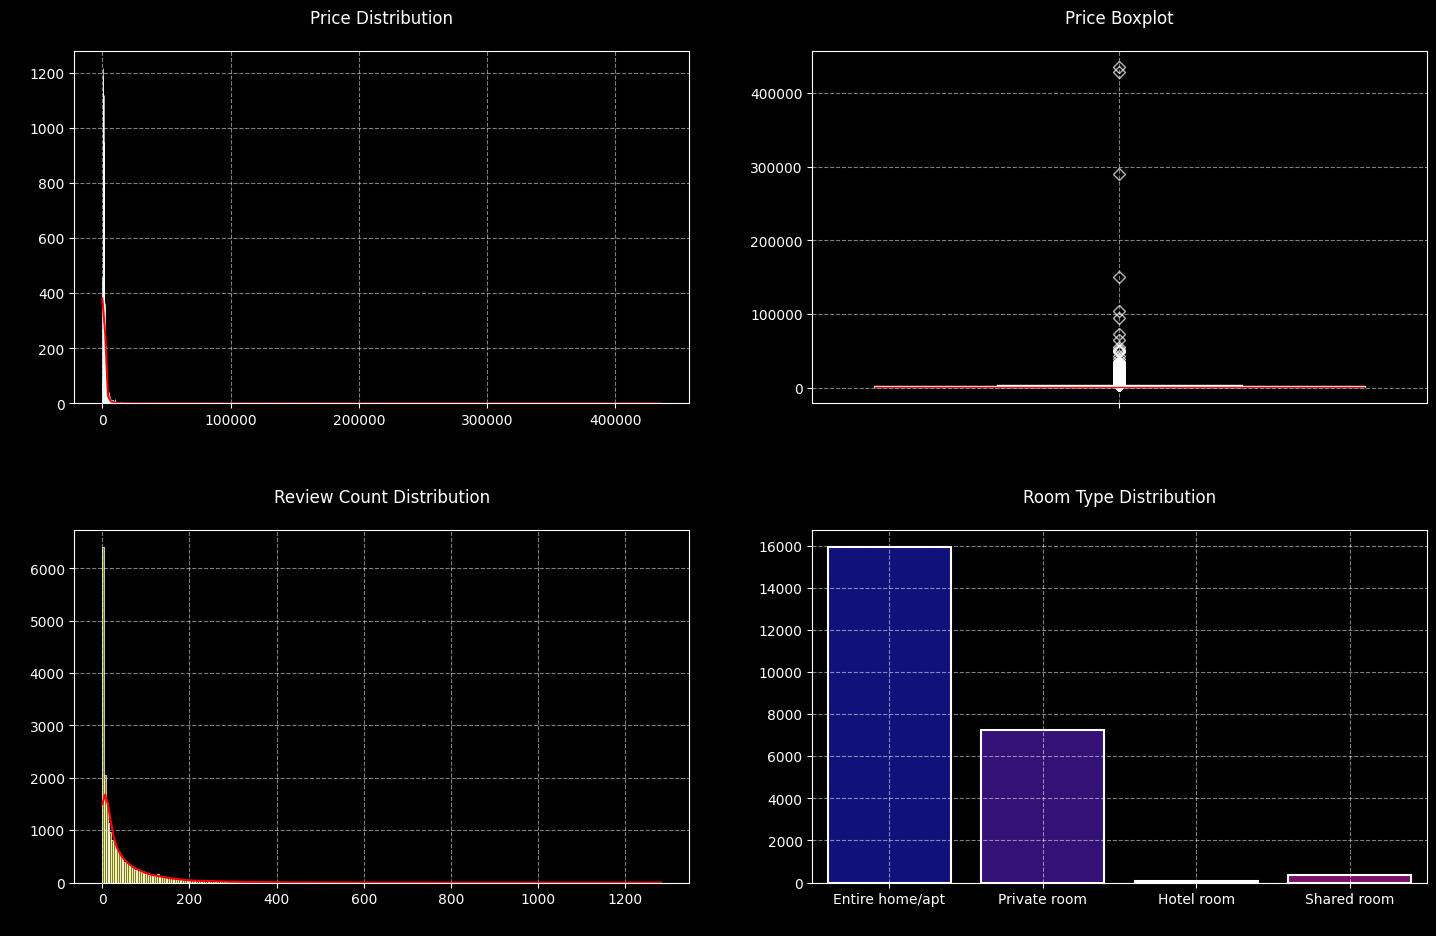

In [22]:
plt.rcParams['text.color'] = 'white'
fig, axes = plt.subplots(2, 2, figsize=(15, 10), facecolor='black')
for ax in axes.flat:
    ax.set_facecolor('black')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.spines[['top','bottom','left','right']].set_color('white')
g = sns.histplot(df['price'], kde=True, ax=axes[0, 0], color='cyan', edgecolor='white', linewidth=0.5)
g.lines[0].set_color('red')
axes[0, 0].set_title('Price Distribution', color='white', pad=20)
g.grid(True, linestyle='--', color='white', alpha=0.5)
g = sns.boxplot(y=df['price'], ax=axes[0, 1], color='lime',
              flierprops=dict(markeredgecolor='white', marker='D', markersize=6, alpha=0.7),
               boxprops=dict(edgecolor='white'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='white'),
               capprops=dict(color='white'))
axes[0, 1].set_title('Price Boxplot', color='white', pad=20)
g.grid(True, linestyle='--', color='white', alpha=0.5)
g = sns.histplot(df['number_of_reviews'], kde=True, ax=axes[1, 0], color='yellow', edgecolor='white', linewidth=0.5)
g.lines[0].set_color('red')
axes[1, 0].set_title('Review Count Distribution', color='white', pad=20)
g.grid(True, linestyle='--', color='white', alpha=0.5)
g = sns.countplot(x='room_type', data=df, palette=Rp, hue='room_type', ax=axes[1, 1],
                  edgecolor='white', linewidth=1.5)
axes[1, 1].set_title('Room Type Distribution', color='white', pad=20)
g.grid(True, linestyle='--', color='white', alpha=0.5)
plt.tight_layout(pad=3.0)
plt.savefig('Distributions1.png')
plt.show()

In [23]:
print(f'neighbourhood count: {df["neighbourhood"].value_counts()}, \n \nroom type count: {df["room_type"].value_counts()} ')

neighbourhood count: neighbourhood
Cuauhtémoc                11197
Miguel Hidalgo             4057
Benito Juárez              2781
Coyoacán                   1379
Álvaro Obregón              888
Tlalpan                     676
Venustiano Carranza         664
Gustavo A. Madero           470
Iztacalco                   362
Cuajimalpa de Morelos       356
Azcapotzalco                316
Iztapalapa                  209
Xochimilco                  120
La Magdalena Contreras      114
Tláhuac                      43
Milpa Alta                   22
Name: count, dtype: int64, 
 
room type count: room_type
Entire home/apt    15936
Private room        7254
Shared room          376
Hotel room            88
Name: count, dtype: int64 


<ipython-input-24-a11290ffd8f9>:2: UserWarning: 
The palette list has fewer values (12) than needed (16) and will cycle, which may produce an uninterpretable plot.
  g = sns.countplot(x='neighbourhood',


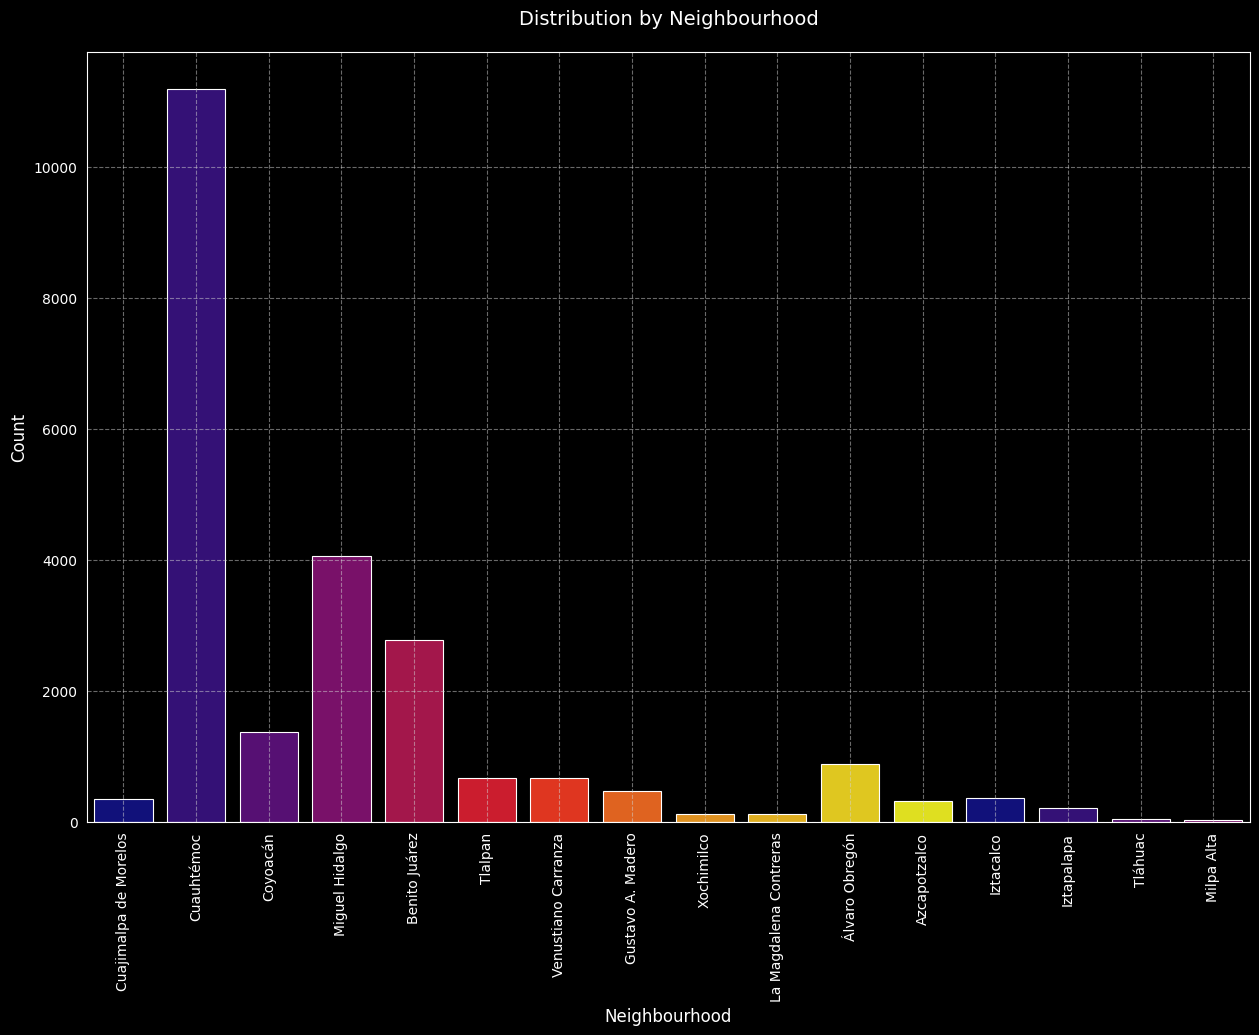

In [24]:
plt.figure(figsize=(15, 10), facecolor='black')
g = sns.countplot(x='neighbourhood',
                 data=df,
                 palette=Rp,
                 hue='neighbourhood',
                 edgecolor='white',
                 linewidth=0.8)
ax = plt.gca()
ax.set_facecolor('black')
plt.xlabel('Neighbourhood', color='white', fontsize=12)
plt.ylabel('Count', color='white', fontsize=12)
plt.title('Distribution by Neighbourhood', color='white', fontsize=14, pad=20)
plt.xticks(rotation=90, color='white')
plt.yticks(color='white')
g.grid(True, linestyle='--', color='lightgray', alpha=0.5)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
plt.savefig('neighbourhood_distribution.png')
plt.show()

In [25]:
def boxplot_graph(df, axisx, axisy, typetitle):
  plt.figure(figsize=(15,4))
  plt.figure(figsize=(15,5), facecolor='black')
  g = sns.catplot(data=df, x=axisx, y=axisy, kind='box', aspect=3, palette=Rp, hue=axisx, flierprops=dict(
                      markeredgecolor='white',
                      marker='D',
                      markersize=6,
                  ),
                  boxprops=dict(edgecolor='white', linewidth=1.2),
                  capprops=dict(color='white', linewidth=1.2),
                  medianprops=dict(color='red', linewidth=1.2))

  g.fig.set_facecolor('black')
  g.ax.set_facecolor('black')
  g.ax.tick_params(axis='x', colors='white', rotation=90)
  g.ax.tick_params(axis='y', colors='white')
  g.ax.spines['bottom'].set_color('white')
  g.ax.spines['left'].set_color('white')
  g.ax.set_xlabel(axisx, color='white', fontsize=12)
  g.ax.set_ylabel(axisy, color='white', fontsize=12)
  g.ax.set_title(f'{axisy} distribution per {axisx}', color='white', fontsize=14, pad=20)
  g.ax.grid(True, linestyle='--', color='white', alpha=0.3)

  for artist in g.ax.artists:
      artist.set_edgecolor('white')
      artist.set_linewidth(1.2)

  plt.tight_layout()
  filename = f"{axisx}_vs_{axisy}_type_{typetitle}.png"
  plt.savefig(filename)
  plt.show()

<ipython-input-25-e1705c41ff9e>:4: UserWarning: 
The palette list has fewer values (12) than needed (16) and will cycle, which may produce an uninterpretable plot.
  g = sns.catplot(data=df, x=axisx, y=axisy, kind='box', aspect=3, palette=Rp, hue=axisx, flierprops=dict(


<Figure size 1500x400 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

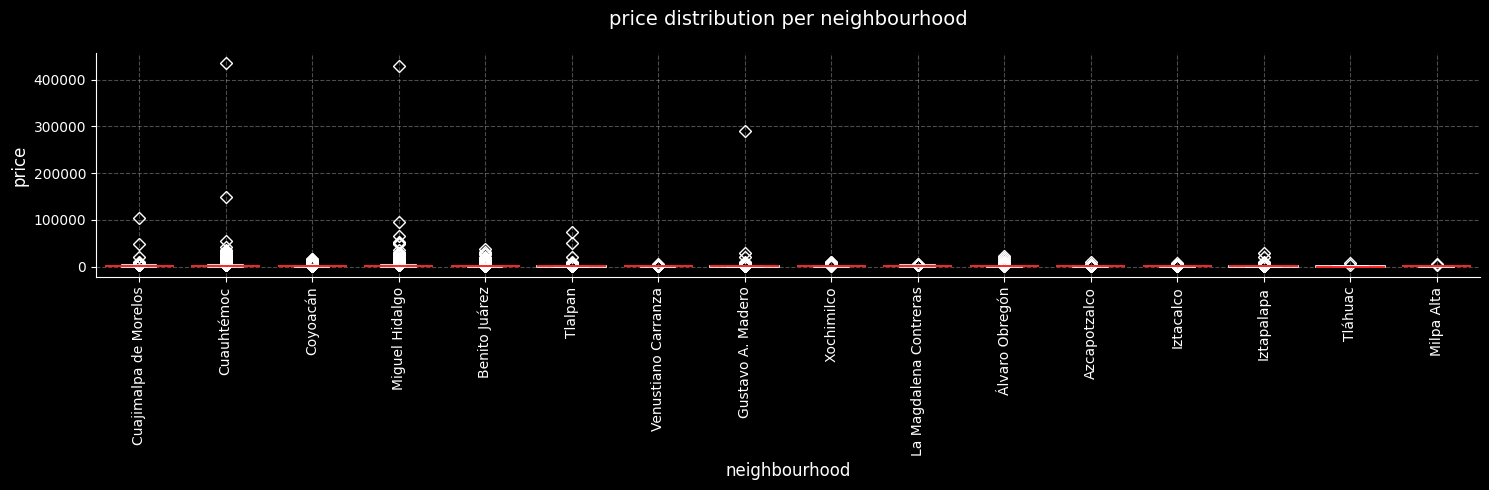

In [26]:
boxplot_graph(df, 'neighbourhood', 'price','complete')

<ipython-input-25-e1705c41ff9e>:4: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  g = sns.catplot(data=df, x=axisx, y=axisy, kind='box', aspect=3, palette=Rp, hue=axisx, flierprops=dict(


<Figure size 1500x400 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

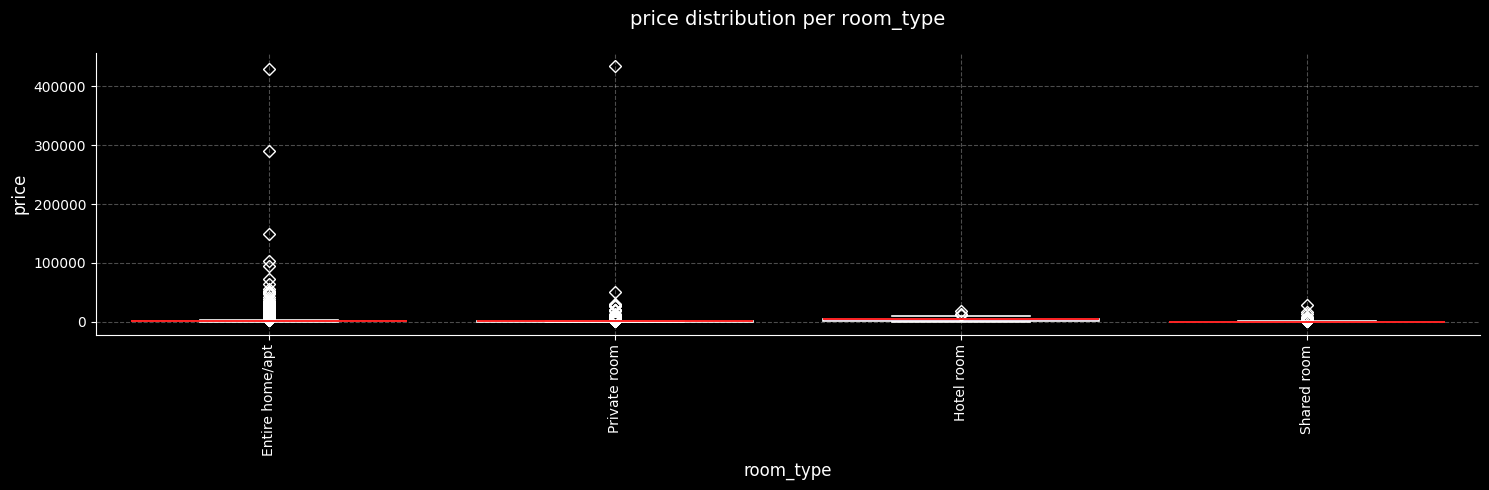

In [27]:
boxplot_graph(df, 'room_type', 'price', 'complete')

In [28]:
print(f'Mean: {df["price"].mean()}, Median: {df["price"].median()}')

Mean: 1511.7123108142387, Median: 999.0


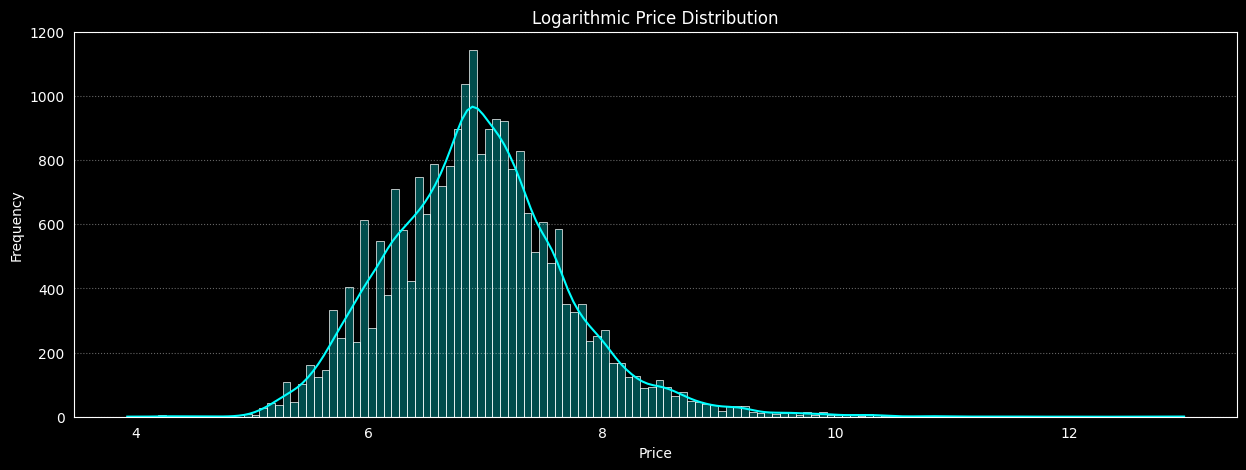

In [29]:
df_temporal = np.log(df['price'] + 1)
df_temporal = pd.DataFrame(df_temporal, columns=['price'])
df_temporal = df_temporal.reset_index(drop=True)
plt.figure(figsize=(15, 5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
sns.histplot(df_temporal['price'], kde=True, edgecolor='white', linewidth=0.5, alpha=0.3, color='cyan',)
plt.title('Logarithmic Price Distribution', color='white')
plt.xlabel('Price', color='white')
plt.ylabel('Frequency', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
plt.grid(True, linestyle=':', color='white', alpha=0.4, axis='y')
plt.savefig('log_price_distribution.png')
plt.show()

In [30]:
df_temporal.head(1)

price
0  8.259976

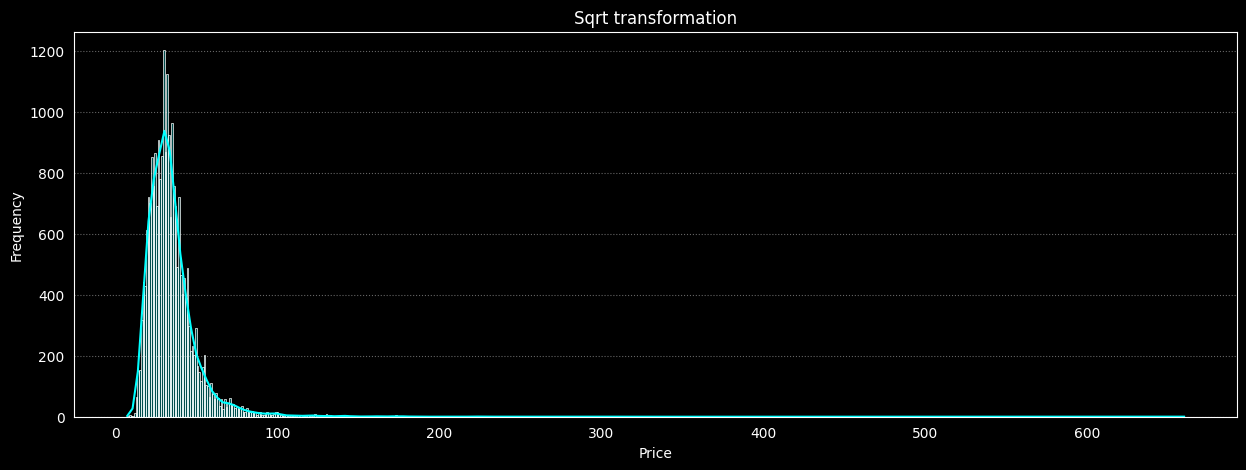

In [31]:
df_temporal = np.sqrt(df['price'])
df_temporal = pd.DataFrame(df_temporal, columns=['price'])
df_temporal = df_temporal.reset_index(drop=True)
plt.figure(figsize=(15, 5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
sns.histplot(df_temporal['price'], kde=True, edgecolor='white', linewidth=0.5, alpha=0.3, color='cyan',)
plt.title('Sqrt transformation', color='white')
plt.xlabel('Price', color='white')
plt.ylabel('Frequency', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
plt.grid(True, linestyle=':', color='white', alpha=0.4, axis='y')
plt.savefig('Sqrt_transformation_price_distribution.png')
plt.show()

In [32]:
df_temporal.head(1)

price
0  62.169124

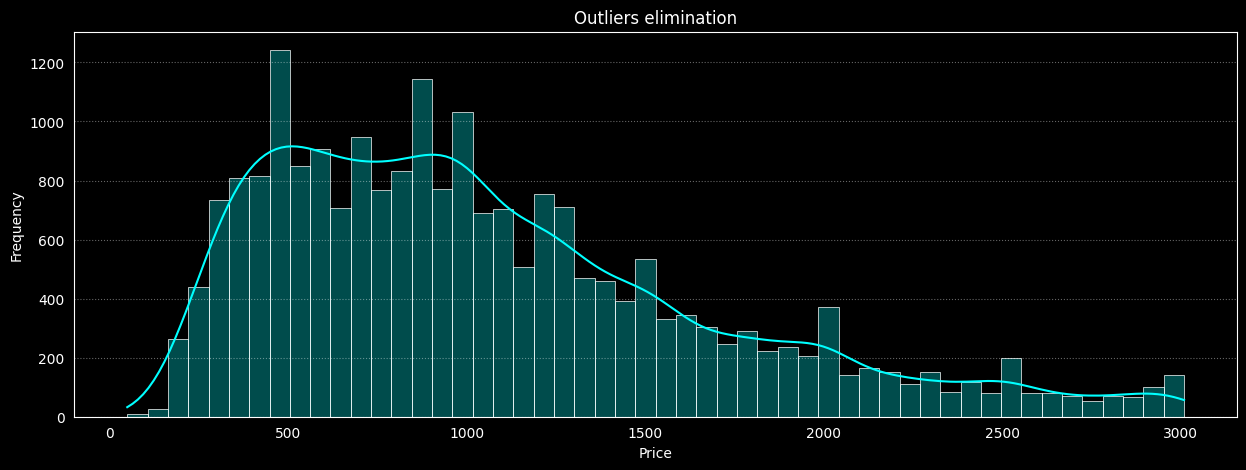

In [33]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
df_temporal = df[df['price'] <= upper_limit]
plt.figure(figsize=(15, 5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
sns.histplot(df_temporal['price'], kde=True, edgecolor='white', linewidth=0.5, alpha=0.3, color='cyan',)
plt.title('Outliers elimination', color='white')
plt.xlabel('Price', color='white')
plt.ylabel('Frequency', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
plt.grid(True, linestyle=':', color='white', alpha=0.4, axis='y')
plt.savefig('Outliers_elimination_price_distribution.png')
plt.show()

In [34]:
df_temporal['price'].describe()

count    21933.000000
mean      1067.383076
std        622.089269
min         50.000000
25%        590.000000
50%        947.000000
75%       1400.000000
max       3009.000000
Name: price, dtype: float64

In [35]:
df['price'].describe()

count     23654.000000
mean       1511.712311
std        5059.805252
min          50.000000
25%         600.250000
50%         999.000000
75%        1564.000000
max      435481.000000
Name: price, dtype: float64

In [36]:
df_temporal=df[df['price']>upper_limit]

In [37]:
df_temporal['price'].describe()

count      1721.000000
mean       7174.392795
std       17678.525612
min        3010.000000
25%        3540.000000
50%        4500.000000
75%        6500.000000
max      435481.000000
Name: price, dtype: float64

In [38]:
df_temporal=df_temporal[df_temporal['price']>=6500]
df_temporal=df_temporal.sort_values(by='price', ascending=False)

In [39]:
df_temporal['price'].describe()

count       432.00000
mean      16076.81250
std       33743.05006
min        6500.00000
25%        7663.50000
50%        9661.00000
75%       14900.00000
max      435481.00000
Name: price, dtype: float64

In [40]:
import folium

mapa = folium.Map(location=[19.4326, -99.1332], zoom_start=12)
for idx, row in df_temporal.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Precio: ${row['price']} - Tipo: {row['room_type']}",
        icon=folium.Icon(color='red')
    ).add_to(mapa)

mapa.save('outliers_cdmx_temporal_1.html')

In [41]:
df_mean=df_temporal.groupby('neighbourhood')['price'].mean().reset_index()
df_mean.rename(columns={'price':'mean_price'}, inplace=True)
df_mean

neighbourhood    mean_price
0            Azcapotzalco   9000.000000
1           Benito Juárez  14105.612903
2                Coyoacán  10644.153846
3   Cuajimalpa de Morelos  29132.857143
4              Cuauhtémoc  14528.942149
5       Gustavo A. Madero  60648.333333
6               Iztacalco   6836.000000
7              Iztapalapa  16302.250000
8          Miguel Hidalgo  18250.830000
9              Milpa Alta   6700.000000
10                Tlalpan  22590.250000
11                Tláhuac   8000.000000
12             Xochimilco   8600.000000
13         Álvaro Obregón  11520.076923

In [42]:
df_temporal=df_temporal.merge(df_mean, on='neighbourhood', how='left')
df_temporal['diference_%']=((df_temporal['price']/df_temporal['mean_price']-1)*100).round(2)
df_temporal[['neighbourhood', 'price', 'mean_price', 'diference_%']].sort_values('price', ascending=False).head(15)

neighbourhood     price    mean_price  diference_%
0              Cuauhtémoc  435481.0  14528.942149      2897.33
1          Miguel Hidalgo  429081.0  18250.830000      2251.02
2       Gustavo A. Madero  289842.0  60648.333333       377.91
3              Cuauhtémoc  150000.0  14528.942149       932.42
4   Cuajimalpa de Morelos  103515.0  29132.857143       255.32
5          Miguel Hidalgo   95000.0  18250.830000       420.52
6                 Tlalpan   73393.0  22590.250000       224.89
7          Miguel Hidalgo   65000.0  18250.830000       256.15
8              Cuauhtémoc   55000.0  14528.942149       278.55
9          Miguel Hidalgo   52200.0  18250.830000       186.01
10                Tlalpan   50000.0  22590.250000       121.33
11         Miguel Hidalgo   49999.0  18250.830000       173.95
12         Miguel Hidalgo   49000.0  18250.830000       168.48
13  Cuajimalpa de Morelos   47800.0  29132.857143        64.08
14             Cuauhtémoc   42857.0  14528.942149       194.98

In [43]:
df_temporal.head(30)

id                                               name  \
0              24020942            Cozy B&B Roma Norte Room 2 con desayuno   
1   1176118239821729583                          Pequeño loft en las Lomas   
2    559360831111324495  Light filled apt center of La Condesa/FiberOptics   
3              52691395    Departamento de 2 pisos en condesa con Roof top   
4    812542373138725094                   Stunning Film/TV Production Site   
5              50303900   Amazing Apartment Monte Athos, Lomas Chapultepec   
6    556592616972927168  Departamento al sur d Ciudad de México UnamPer...   
7              30043309                                           Rombo IV   
8              31444436                                          No activo   
9              36799468                                      Casa Rombo II   
10             25873990            Rancho Guadalupe Ajusco Riding Holidays   
11  1171687638662203439               Luxurious Apartment City Centre CDMX   
12             29217617  DEPTO COMPLETO GRANDE ZONA POLANCO, ANAHUAC I ...   
13  1196285776211239613                      Casa en el corazón de bosques   
14  1179196519229213225                               Santa Casa by Tasman   
15             51799961                      Espacio ÚNICO en la Del Valle   
16             51984334          Luxury apartment in the heart of Polanco.   
17             52440446        VH | Gran Casa gym+wifi | Col. Juarez | 176   
18             43527513  3 Bedroom Apartment in Centro, CDMX [Mexico City]   
19   965379926805119099       VH | Full apartments 36 pax | Roma Sur | 410   
20  1250219532084042850                   Condesa Art Deco House w/Terrace   
21  1183699847314444119   *Condesa* Charming and spacious 16BR apartments*   
22   783307566312088136            w* | Amazing Casa Wynwood in Roma Norte   
23             18522225  Centro. Downtown Apartment. Great view. Vista....   
24              6871835                                WTC México Napoles.   
25             33393654                Habitación en Blas Pascal - Polanco   
26   634355755865414097     Hermoso departamento enseguida de plaza grande   
27   579929493558968063       Lovely apartment in the center of La Condesa   
28             28034464  Casa y patio con valor artístico para 24 huésp...   
29   845591958137976559  Hotel boutique cerca de Polanco a 10min de Mas...   

      host_id      host_name          neighbourhood   latitude  longitude  \
0   176362944          Cesar             Cuauhtémoc  19.423950 -99.156560   
1   137132393        Rodrigo         Miguel Hidalgo  19.419203 -99.216031   
2   444486238            Ben      Gustavo A. Madero  19.549060 -99.153880   
3     4401504         Adolfo             Cuauhtémoc  19.405080 -99.170990   
4     4953229            Ira  Cuajimalpa de Morelos  19.331181 -99.326523   
5   137132393        Rodrigo         Miguel Hidalgo  19.420050 -99.215180   
6   155943365           Jony                Tlalpan  19.284810 -99.195480   
7   207171317           Casa         Miguel Hidalgo  19.401665 -99.254776   
8   107194368       Cristina             Cuauhtémoc  19.429420 -99.171700   
9   207171317           Casa         Miguel Hidalgo  19.401090 -99.254190   
10  100815374    Olga&Perico                Tlalpan  19.214610 -99.195750   
11   89306622  Cédric Adrian         Miguel Hidalgo  19.429591 -99.176424   
12  220137622         Alicia         Miguel Hidalgo  19.442430 -99.181880   
13    6504552        Barbara  Cuajimalpa de Morelos  19.387306 -99.257389   
14  352959504           Jaco             Cuauhtémoc  19.415525 -99.162577   
15  103629467          Marco          Benito Juárez  19.374230 -99.174410   
16  408007648       Emiliano         Miguel Hidalgo  19.428768 -99.193321   
17  382880251         Carcho             Cuauhtémoc  19.431843 -99.168762   
18  346685643        Getgopi             Cuauhtémoc  19.437080 -99.130070   
19  498108387        Virtual             Cuauhtémoc  19.407593

In [44]:
def relations_plot(df, axisx, axisy, diference, title_name):
    fig = plt.figure(figsize=(15,5), facecolor='black')
    ax = fig.add_subplot(111)
    ax.set_facecolor('black')
    sns.scatterplot(x=axisx, y=axisy, data=df, hue=diference, ax=ax)
    ax.grid(True, linestyle='--', color='white', alpha=0.7)
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.set_title(f'{axisx} vs {axisy}', color='white')
    ax.set_xlabel(axisx, color='white')
    ax.set_ylabel(axisy, color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    filename = f"{axisx}_vs_{axisy}_in_{title_name}.png"
    plt.savefig(filename)
    plt.show()

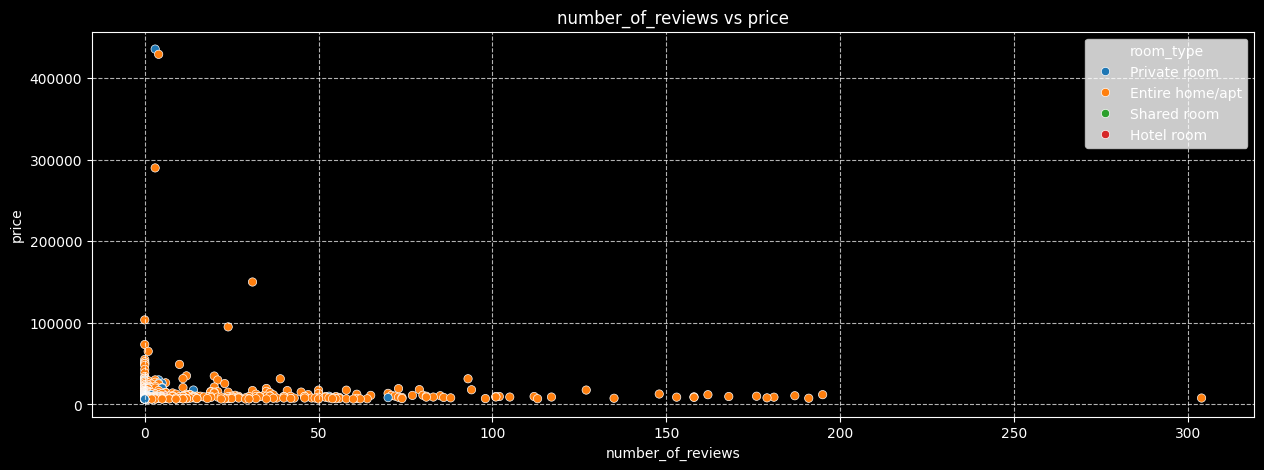

In [45]:
relations_plot(df_temporal, 'number_of_reviews', 'price', 'room_type', 'outliers_1')

<ipython-input-25-e1705c41ff9e>:4: UserWarning: 
The palette list has fewer values (12) than needed (14) and will cycle, which may produce an uninterpretable plot.
  g = sns.catplot(data=df, x=axisx, y=axisy, kind='box', aspect=3, palette=Rp, hue=axisx, flierprops=dict(


<Figure size 1500x400 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

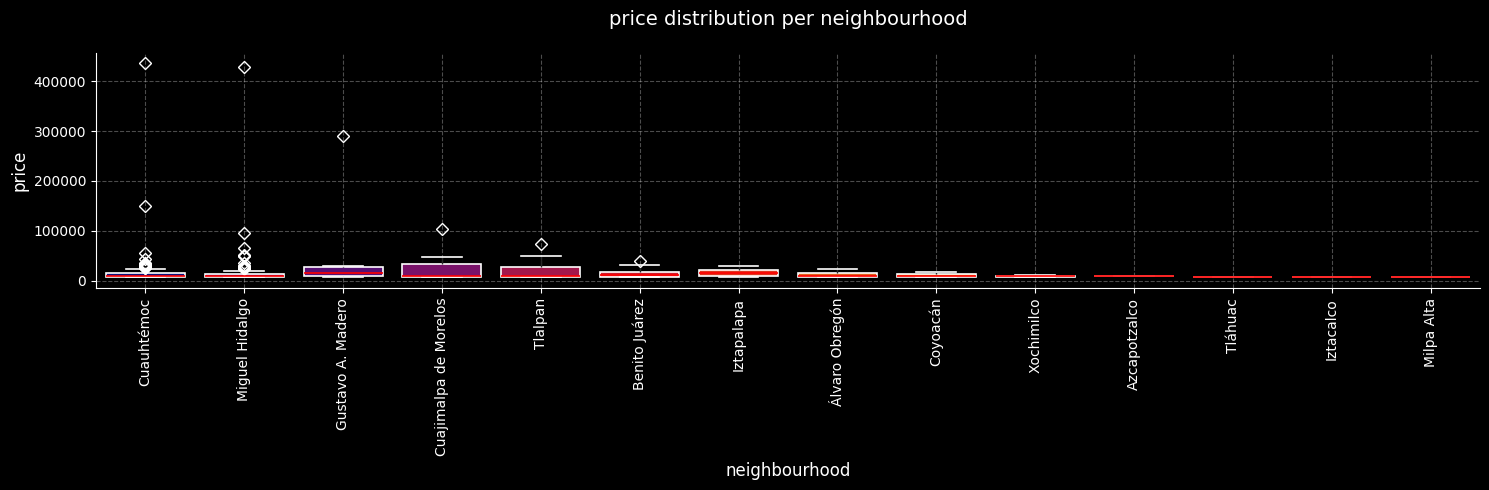

In [46]:
boxplot_graph(df_temporal, 'neighbourhood', 'price','outliers')

<ipython-input-25-e1705c41ff9e>:4: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  g = sns.catplot(data=df, x=axisx, y=axisy, kind='box', aspect=3, palette=Rp, hue=axisx, flierprops=dict(


<Figure size 1500x400 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

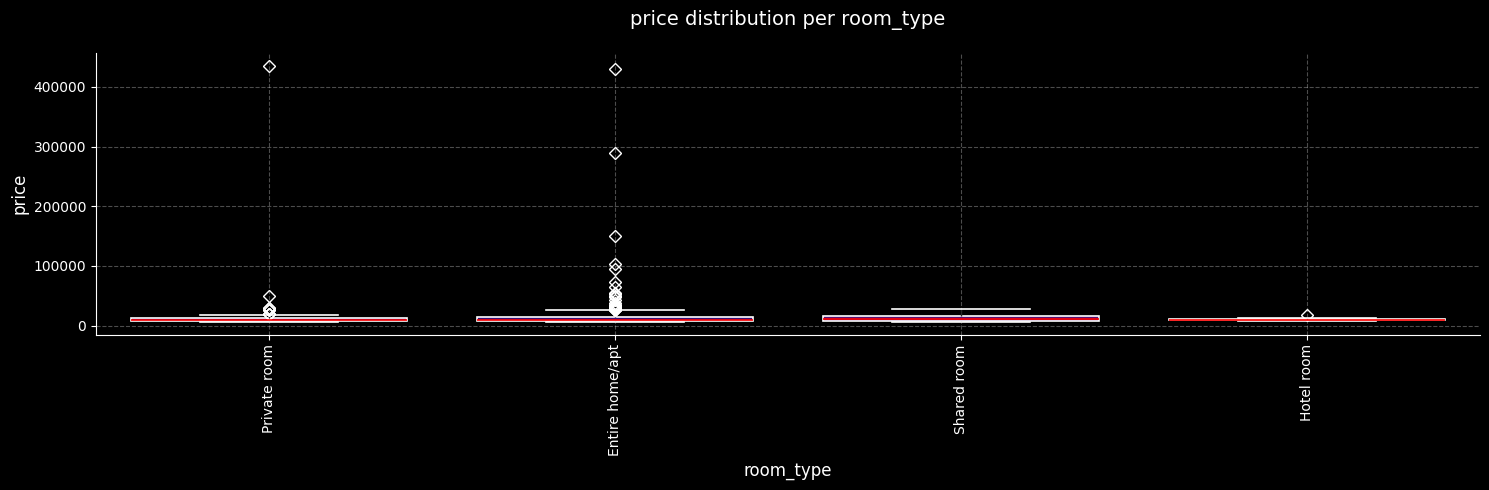

In [47]:
boxplot_graph(df_temporal, 'room_type', 'price', 'outliers')

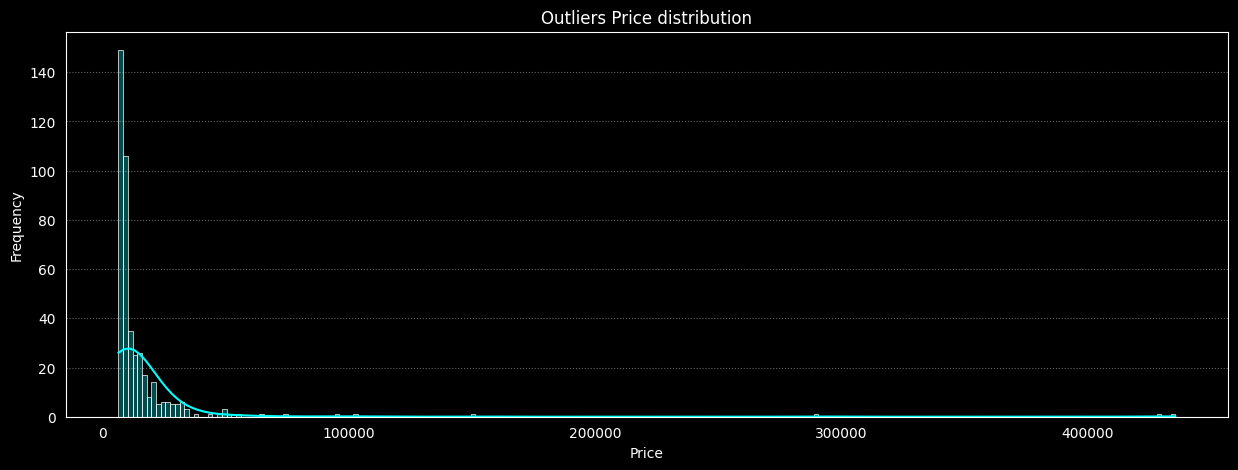

In [48]:
plt.figure(figsize=(15, 5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
sns.histplot(df_temporal['price'], kde=True, edgecolor='white', linewidth=0.5, alpha=0.3, color='cyan',)
plt.title('Outliers Price distribution', color='white')
plt.xlabel('Price', color='white')
plt.ylabel('Frequency', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
plt.grid(True, linestyle=':', color='white', alpha=0.4, axis='y')
plt.savefig('Outliers_price_distribution.png')
plt.show()

In [49]:
df_max_outliers=df_temporal[df_temporal['price']>=90000]
df_max_outliers=df_max_outliers.sort_values(by='price', ascending=False)

In [50]:
df_max_outliers['price'].describe()

count         6.000000
mean     250486.500000
std      157189.074695
min       95000.000000
25%      115136.250000
50%      219921.000000
75%      394271.250000
max      435481.000000
Name: price, dtype: float64

In [51]:
df_max_outliers

id                                               name  \
0             24020942            Cozy B&B Roma Norte Room 2 con desayuno   
1  1176118239821729583                          Pequeño loft en las Lomas   
2   559360831111324495  Light filled apt center of La Condesa/FiberOptics   
3             52691395    Departamento de 2 pisos en condesa con Roof top   
4   812542373138725094                   Stunning Film/TV Production Site   
5             50303900   Amazing Apartment Monte Athos, Lomas Chapultepec   

     host_id host_name          neighbourhood   latitude  longitude  \
0  176362944     Cesar             Cuauhtémoc  19.423950 -99.156560   
1  137132393   Rodrigo         Miguel Hidalgo  19.419203 -99.216031   
2  444486238       Ben      Gustavo A. Madero  19.549060 -99.153880   
3    4401504    Adolfo             Cuauhtémoc  19.405080 -99.170990   
4    4953229       Ira  Cuajimalpa de Morelos  19.331181 -99.326523   
5  137132393   Rodrigo         Miguel Hidalgo  19.420050 -99.215180   

         room_type     price  minimum_nights  number_of_reviews  \
0     Private room  435481.0               2                  3   
1  Entire home/apt  429081.0               1                  4   
2  Entire home/apt  289842.0               3                  3   
3  Entire home/apt  150000.0             365                 31   
4  Entire home/apt  103515.0               1                  0   
5  Entire home/apt   95000.0               4                 24   

   calculated_host_listings_count  availability_365    mean_price  diference_%  
0                               3               157  14528.942149      2897.33  
1                              14                86  18250.830000      2251.02  
2                               2               179  60648.333333       377.91  
3                               1               364  14528.942149       932.42  
4                               1               365  29132.857143       255.32  
5                              14                32  18250.830000       420.52

In [52]:
df_temporal=df_temporal[df_temporal['price']<90000]

In [53]:
df_temporal['price'].describe()

count      426.000000
mean     12775.267606
std       8793.158698
min       6500.000000
25%       7635.000000
50%       9661.000000
75%      14489.000000
max      73393.000000
Name: price, dtype: float64

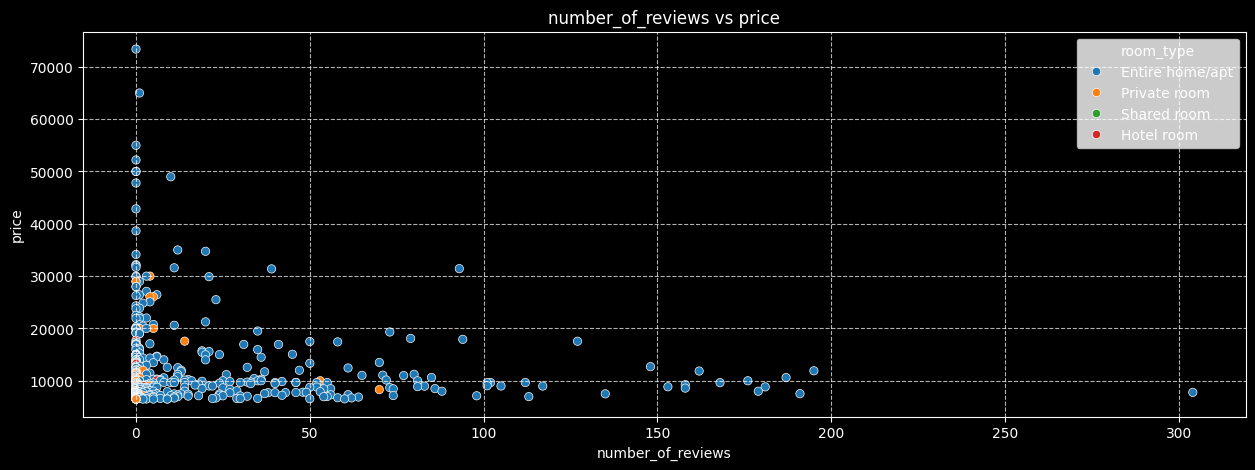

In [54]:
relations_plot(df_temporal, 'number_of_reviews', 'price', 'room_type', 'outliers_2')

In [55]:
df_temporal[df_temporal['number_of_reviews']==0]['price'].describe()

count      150.000000
mean     14595.526667
std      11137.637904
min       6500.000000
25%       7523.500000
50%      10307.500000
75%      16963.500000
max      73393.000000
Name: price, dtype: float64

In [56]:
df_max_outliers=df_temporal[df_temporal['price']>35000]
df_max_outliers=df_max_outliers.sort_values(by='price', ascending=False)

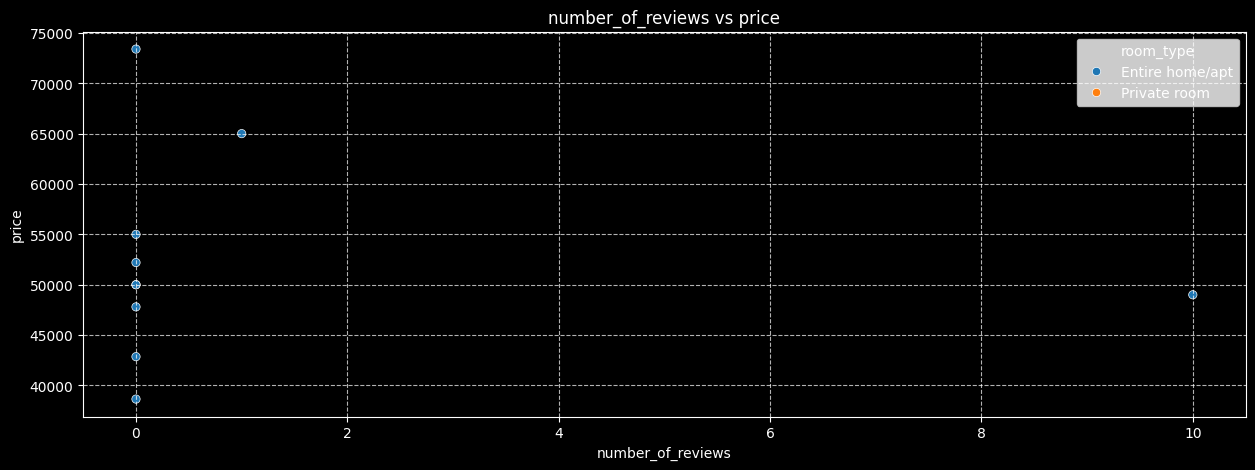

In [57]:
relations_plot(df_max_outliers, 'number_of_reviews', 'price', 'room_type', 'outliers_3')

In [58]:
df_max_outliers

id                                               name  \
6    556592616972927168  Departamento al sur d Ciudad de México UnamPer...   
7              30043309                                           Rombo IV   
8              31444436                                          No activo   
9              36799468                                      Casa Rombo II   
10             25873990            Rancho Guadalupe Ajusco Riding Holidays   
11  1171687638662203439               Luxurious Apartment City Centre CDMX   
12             29217617  DEPTO COMPLETO GRANDE ZONA POLANCO, ANAHUAC I ...   
13  1196285776211239613                      Casa en el corazón de bosques   
14  1179196519229213225                               Santa Casa by Tasman   
15             51799961                      Espacio ÚNICO en la Del Valle   

      host_id      host_name          neighbourhood   latitude  longitude  \
6   155943365           Jony                Tlalpan  19.284810 -99.195480   
7   207171317           Casa         Miguel Hidalgo  19.401665 -99.254776   
8   107194368       Cristina             Cuauhtémoc  19.429420 -99.171700   
9   207171317           Casa         Miguel Hidalgo  19.401090 -99.254190   
10  100815374    Olga&Perico                Tlalpan  19.214610 -99.195750   
11   89306622  Cédric Adrian         Miguel Hidalgo  19.429591 -99.176424   
12  220137622         Alicia         Miguel Hidalgo  19.442430 -99.181880   
13    6504552        Barbara  Cuajimalpa de Morelos  19.387306 -99.257389   
14  352959504           Jaco             Cuauhtémoc  19.415525 -99.162577   
15  103629467          Marco          Benito Juárez  19.374230 -99.174410   

          room_type    price  minimum_nights  number_of_reviews  \
6   Entire home/apt  73393.0               1                  0   
7   Entire home/apt  65000.0               2                  1   
8   Entire home/apt  55000.0               2                  0   
9   Entire home/apt  52200.0               1                  0   
10     Private room  50000.0               2                  0   
11  Entire home/apt  49999.0               1                  0   
12  Entire home/apt  49000.0               3                 10   
13  Entire home/apt  47800.0               1                  0   
14  Entire home/apt  42857.0               2                  0   
15  Entire home/apt  38646.0              90                  0   

    calculated_host_listings_count  availability_365    mean_price  \
6                                1               365  22590.250000   
7                                2               364  18250.830000   
8                                1               178  14528.942149   
9                                2               365  18250.830000   
10                               1                69  22590.250000   
11                               1               270  18250.830000   
12                               1               365  18250.830000   
13                               3               269  29132.857143   
14                              18               206  14528.942149   
15                               1               180  14105.612903   

    diference_%  
6        224.89  
7        256.15  
8        278.55  
9        186.01  
10       121.33  
11       173.95  
12       168.48  
13        64.08  
14       194.98  
15       173.98

In [59]:
df_temporal=df_temporal[df_temporal['price']<43000]

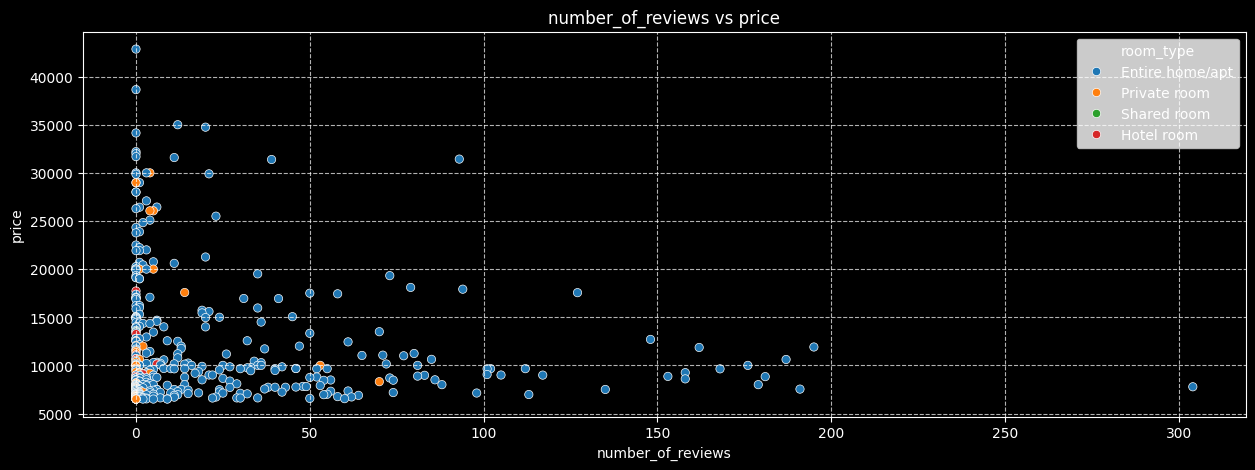

In [60]:
relations_plot(df_temporal, 'number_of_reviews', 'price', 'room_type', 'whitout_outliers')

In [61]:
df[df['price']>43000]['price'].count()

14

In [62]:
df[df['price']<43000]['price'].describe()

count    23640.000000
mean      1430.318613
std       1909.565124
min         50.000000
25%        600.000000
50%        999.000000
75%       1561.000000
max      42857.000000
Name: price, dtype: float64

In [63]:
df=df[df['price']<43000]

In [64]:
df.head(3)

id                                              name  host_id host_name  \
0  35797                                       Villa Dante   153786      Dici   
2  67703                 2 bedroom apt. deco bldg, Condesa   334451  Nicholas   
3  70644  Beautiful light Studio Coyoacan- full equipped !   212109    Trisha   

           neighbourhood  latitude  longitude        room_type   price  \
0  Cuajimalpa de Morelos  19.38382  -99.27334  Entire home/apt  3865.0   
2             Cuauhtémoc  19.41152  -99.16857  Entire home/apt  2029.0   
3               Coyoacán  19.35614  -99.16308  Entire home/apt  1140.0   

   minimum_nights  number_of_reviews  calculated_host_listings_count  \
0               1                  0                               1   
2               2                 49                               2   
3               5                127                               3   

   availability_365  
0               363  
2               325  
3               257

In [65]:
df.describe()

id       host_id      latitude     longitude         price  \
count  2.364000e+04  2.364000e+04  23640.000000  23640.000000  23640.000000   
mean   5.564901e+17  2.193070e+08     19.406301    -99.166222   1430.318613   
std    4.890761e+17  1.860953e+08      0.041710      0.032586   1909.565124   
min    3.579700e+04  7.365000e+03     19.177848    -99.339630     50.000000   
25%    4.166626e+07  5.099606e+07     19.393877    -99.178748    600.000000   
50%    7.052580e+17  1.600891e+08     19.415610    -99.167519    999.000000   
75%    1.005885e+18  3.844177e+08     19.432133    -99.154380   1561.000000   
max    1.252933e+18  6.535037e+08     19.553380    -98.966450  42857.000000   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
count    23640.000000       23640.000000                    23640.000000   
mean         3.759729          49.119332                       18.260406   
std         16.713203          77.859946                       42.734596   
min          1.000000           0.000000                        1.000000   
25%          1.000000           4.000000                        1.000000   
50%          2.000000          19.000000                        4.000000   
75%          2.000000          62.000000                       12.000000   
max        730.000000        1282.000000                      258.000000   

       availability_365  
count      23640.000000  
mean         239.169036  
std          113.960088  
min            0.000000  
25%          145.000000  
50%          268.000000  
75%          343.000000  
max          365.000000

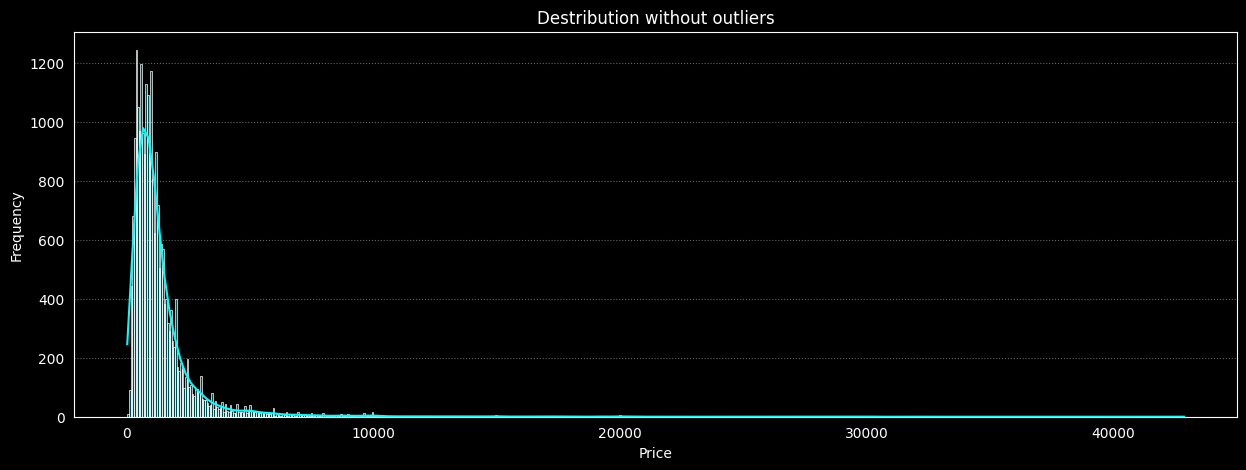

In [66]:
plt.figure(figsize=(15, 5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
sns.histplot(df['price'], kde=True, edgecolor='white', linewidth=0.5, alpha=0.3, color='cyan',)
plt.title('Destribution without outliers', color='white')
plt.xlabel('Price', color='white')
plt.ylabel('Frequency', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
plt.grid(True, linestyle=':', color='white', alpha=0.4, axis='y')
plt.savefig('Destribution_without_outliers_df_original.png')
plt.show()

<ipython-input-25-e1705c41ff9e>:4: UserWarning: 
The palette list has fewer values (12) than needed (16) and will cycle, which may produce an uninterpretable plot.
  g = sns.catplot(data=df, x=axisx, y=axisy, kind='box', aspect=3, palette=Rp, hue=axisx, flierprops=dict(


<Figure size 1500x400 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

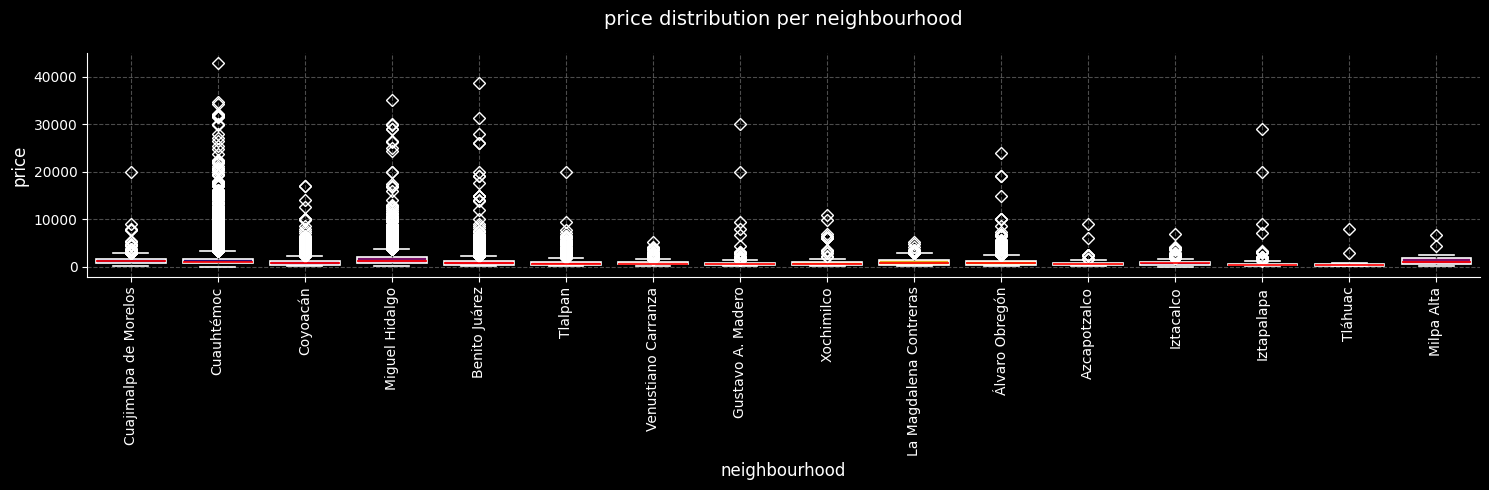

In [67]:
boxplot_graph(df, 'neighbourhood', 'price','without_outliers_destribution')

In [68]:
print(f"Prices under the upper limit:{df[df['price']<upper_limit]['price'].count()}")
print(f"Prices over the upper limit: {df[df['price']>upper_limit]['price'].count()}")
print(f"Low prices: {df[df['price']<=500]['price'].count()}")
print(f"Medium prices: {df[(df['price']>500) & (df['price']<=1500)]['price'].count()}")
print(f"High prices: {df[(df['price']>1500) & (df['price']<=upper_limit)]['price'].count()}")
print(f"Luxury prices: {df[df['price']>upper_limit]['price'].count()}")

Prices under the upper limit:21933
Prices over the upper limit: 1707
Low prices: 4294
Medium prices: 13072
High prices: 4567
Luxury prices: 1707


In [69]:
bins=[0,500,1500,3000,10000, np.inf]
labels=['Low','Medium','High', 'Very_High','Luxury']
df_temporal=df.copy()
df_temporal['price_category']=pd.cut(df_temporal['price'], bins=bins, labels=labels, include_lowest=True)

In [70]:
df_temporal['price_category'].value_counts()

price_category
Medium       13072
High          4557
Low           4294
Very_High     1542
Luxury         175
Name: count, dtype: int64

In [71]:
df_temporal['price_category'].count()

23640

<ipython-input-72-30289ab3f1c3>:2: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  g = sns.countplot(x='price_category',


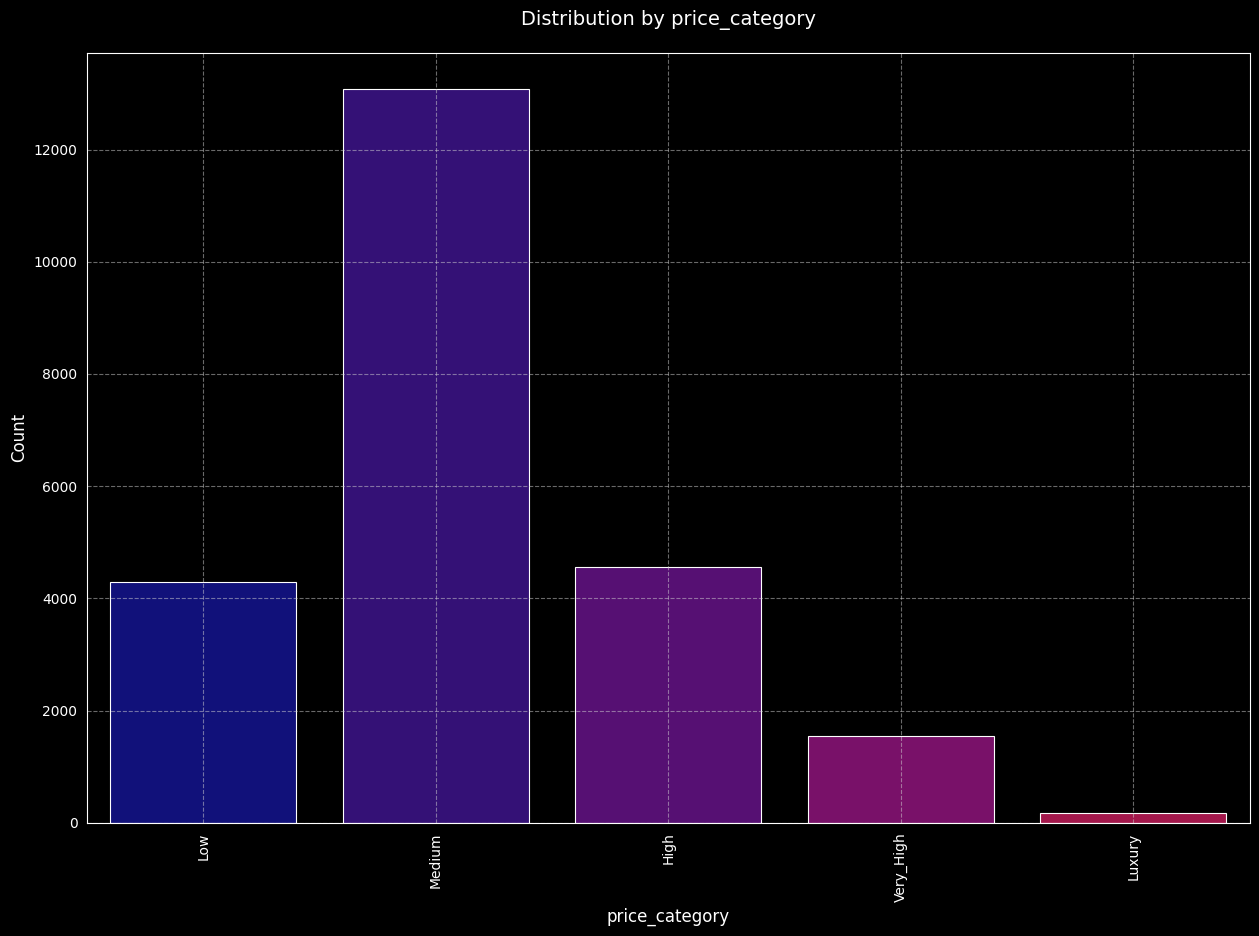

In [72]:
plt.figure(figsize=(15, 10), facecolor='black')
g = sns.countplot(x='price_category',
                 data=df_temporal,
                 palette=Rp,
                 hue='price_category',
                 edgecolor='white',
                 linewidth=0.8)
ax = plt.gca()
ax.set_facecolor('black')
plt.xlabel('price_category', color='white', fontsize=12)
plt.ylabel('Count', color='white', fontsize=12)
plt.title('Distribution by price_category', color='white', fontsize=14, pad=20)
plt.xticks(rotation=90, color='white')
plt.yticks(color='white')
g.grid(True, linestyle='--', color='lightgray', alpha=0.5)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
plt.savefig('price_category_distribution.png')
plt.show()

In [73]:
df_temporal['logarithmic_price'] = np.log(df_temporal['price'] + 1)

In [74]:
df_temporal.describe()

id       host_id      latitude     longitude         price  \
count  2.364000e+04  2.364000e+04  23640.000000  23640.000000  23640.000000   
mean   5.564901e+17  2.193070e+08     19.406301    -99.166222   1430.318613   
std    4.890761e+17  1.860953e+08      0.041710      0.032586   1909.565124   
min    3.579700e+04  7.365000e+03     19.177848    -99.339630     50.000000   
25%    4.166626e+07  5.099606e+07     19.393877    -99.178748    600.000000   
50%    7.052580e+17  1.600891e+08     19.415610    -99.167519    999.000000   
75%    1.005885e+18  3.844177e+08     19.432133    -99.154380   1561.000000   
max    1.252933e+18  6.535037e+08     19.553380    -98.966450  42857.000000   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
count    23640.000000       23640.000000                    23640.000000   
mean         3.759729          49.119332                       18.260406   
std         16.713203          77.859946                       42.734596   
min          1.000000           0.000000                        1.000000   
25%          1.000000           4.000000                        1.000000   
50%          2.000000          19.000000                        4.000000   
75%          2.000000          62.000000                       12.000000   
max        730.000000        1282.000000                      258.000000   

       availability_365  logarithmic_price  
count      23640.000000       23640.000000  
mean         239.169036           6.925390  
std          113.960088           0.757578  
min            0.000000           3.931826  
25%          145.000000           6.398595  
50%          268.000000           6.907755  
75%          343.000000           7.353722  
max          365.000000          10.665648

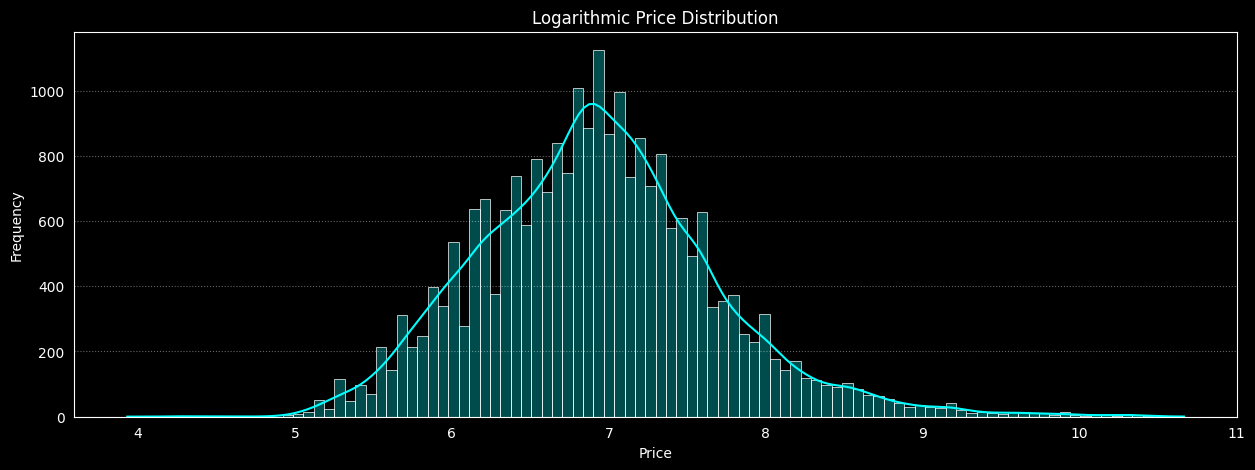

In [75]:
plt.figure(figsize=(15, 5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
sns.histplot(df_temporal['logarithmic_price'], kde=True, edgecolor='white', linewidth=0.5, alpha=0.3, color='cyan',)
plt.title('Logarithmic Price Distribution', color='white')
plt.xlabel('Price', color='white')
plt.ylabel('Frequency', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
plt.grid(True, linestyle=':', color='white', alpha=0.4, axis='y')
plt.savefig('log_price_distribution_final.png')
plt.show()

In [76]:
import plotly.express as px
from folium.plugins import HeatMap

In [77]:
fig = px.scatter_mapbox(
    df_temporal,
    lat='latitude',
    lon='longitude',
    color='price_category',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    hover_name='neighbourhood',
    hover_data={'price': ':.2f', 'room_type': True},
    mapbox_style='carto-darkmatter',
    zoom=10,
    title='Properties in CDMX per Category',
    height=600)
fig.update_layout(
    margin=dict(l=0, r=0, t=80, b=0),
    title_x=0.5,
    plot_bgcolor='black',
    paper_bgcolor='black',
    title_font=dict(
        color='white',
        size=24
    ),
    legend=dict(
        title_font=dict(color='white'),
        font=dict(color='white'),
        bgcolor='rgba(0,0,0,0.5)'
    ),
    hoverlabel=dict(
        bgcolor='black',
        font=dict(color='white')
    ))
fig.update_traces(
    marker=dict(size=8, opacity=0.8))
fig.write_html('properties_in_cdmx_per_category.html')
fig.show()

In [78]:
df_ANOVA=df_temporal.copy()

In [79]:
df_ANOVA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23640 entries, 0 to 26581
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              23640 non-null  int64   
 1   name                            23640 non-null  object  
 2   host_id                         23640 non-null  int64   
 3   host_name                       23640 non-null  object  
 4   neighbourhood                   23640 non-null  object  
 5   latitude                        23640 non-null  float64 
 6   longitude                       23640 non-null  float64 
 7   room_type                       23640 non-null  object  
 8   price                           23640 non-null  float64 
 9   minimum_nights                  23640 non-null  int64   
 10  number_of_reviews               23640 non-null  int64   
 11  calculated_host_listings_count  23640 non-null  int64   
 12  availability_365       

In [80]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 8.8 MB/s eta 0:00:00


In [81]:
from scipy.stats import shapiro, levene, kruskal
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from pingouin import welch_anova

In [82]:
# ANOVA con price original
model = ols('price ~ C(room_type)', data=df_ANOVA).fit()
print('Original ANOVA:\n', anova_lm(model))

Original ANOVA:
                    df        sum_sq       mean_sq           F         PR(>F)
C(room_type)      3.0  5.078670e+09  1.692890e+09  493.261742  6.319089e-311
Residual      23636.0  8.111950e+10  3.432032e+06         NaN            NaN


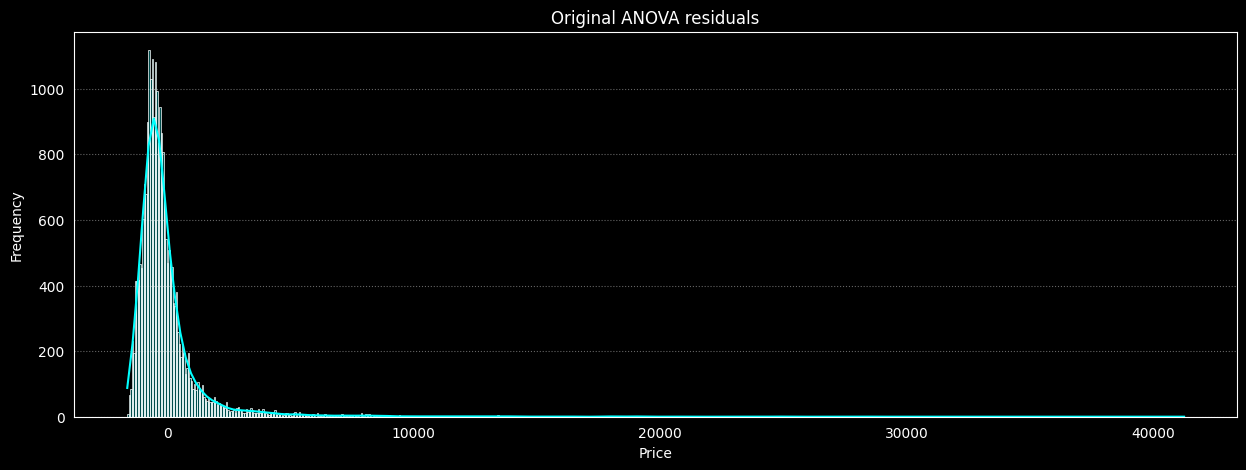

In [211]:
# Normalidad de residuos
residuals = model.resid
plt.figure(figsize=(15, 5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
sns.histplot(residuals, kde=True, edgecolor='white', linewidth=0.5, alpha=0.3, color='cyan',)
plt.title('Original ANOVA residuals', color='white')
plt.xlabel('Price', color='white')
plt.ylabel('Frequency', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
plt.grid(True, linestyle=':', color='white', alpha=0.4, axis='y')
plt.savefig('Original_ANOVA_residuals_distribution_final.png')
plt.show()

In [84]:
_, p_shapiro = shapiro(residuals)
print(f"Shapiro-Wilk p-value: {p_shapiro:.4f}")

Shapiro-Wilk p-value: 0.0000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23640.



In [85]:
# Transformación logarítmica
model_log = ols('logarithmic_price ~ C(room_type)', data=df_ANOVA).fit()
print('\nANOVA con Log Price:\n', anova_lm(model_log))


ANOVA con Log Price:
                    df       sum_sq      mean_sq           F  PR(>F)
C(room_type)      3.0  3671.316643  1223.772214  2922.99732     0.0
Residual      23636.0  9895.691610     0.418670         NaN     NaN


In [86]:
# Homocedasticidad
grupos = [df_ANOVA[df_ANOVA['room_type'] == tipo]['price'] for tipo in df_ANOVA['room_type'].unique()]
_, p_levene = levene(*grupos)
print(f"\nLevene p-value: {p_levene:.4f}")


Levene p-value: 0.0000


In [87]:
# Welch's ANOVA
if p_levene < 0.05:
    print("\nUsando Welch's ANOVA:")
    print(welch_anova(data=df_ANOVA, dv='price', between='room_type'))


Usando Welch's ANOVA:
      Source  ddof1       ddof2           F          p-unc       np2
0  room_type      3  353.932901  647.641793  2.550961e-143  0.058919


In [88]:
# Kruskal-Wallis
stat, p_kruskal = kruskal(*grupos)
print(f"\nKruskal-Wallis p-value: {p_kruskal:.4f}")


Kruskal-Wallis p-value: 0.0000


In [89]:
from scipy.stats import f_oneway

In [90]:
# Ejemplo para room_type
grupos = [df_ANOVA[df_ANOVA['room_type'] == tipo]['logarithmic_price'] for tipo in df_ANOVA['room_type'].unique()]
f_stat, p_value = f_oneway(*grupos)
print(f"ANOVA for room_type: F = {f_stat:.2f}, p = {p_value:.4f}")

ANOVA for room_type: F = 2923.00, p = 0.0000


In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [92]:
df_encoded = pd.get_dummies(df_temporal, columns=['neighbourhood', 'room_type'], drop_first=True)

In [93]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23640 entries, 0 to 26581
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   id                                    23640 non-null  int64   
 1   name                                  23640 non-null  object  
 2   host_id                               23640 non-null  int64   
 3   host_name                             23640 non-null  object  
 4   latitude                              23640 non-null  float64 
 5   longitude                             23640 non-null  float64 
 6   price                                 23640 non-null  float64 
 7   minimum_nights                        23640 non-null  int64   
 8   number_of_reviews                     23640 non-null  int64   
 9   calculated_host_listings_count        23640 non-null  int64   
 10  availability_365                      23640 non-null  int64   
 11  price_c

In [94]:
X = df_encoded.drop(columns=['price', 'price_category', 'id', 'host_id', 'host_name', 'name', 'logarithmic_price'])
y = df_encoded['logarithmic_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
Importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
print(Importance.head(10))

                          Variable  Importance
22          room_type_Private room    0.213201
0                         latitude    0.194149
1                        longitude    0.193772
5                 availability_365    0.101648
4   calculated_host_listings_count    0.092344
3                number_of_reviews    0.083342
23           room_type_Shared room    0.049157
2                   minimum_nights    0.044739
21            room_type_Hotel room    0.005637
9         neighbourhood_Cuauhtémoc    0.003691


In [95]:
# ANOVA con price original
model = ols('price ~ C(neighbourhood)', data=df_ANOVA).fit()
print('Original Anova:\n', anova_lm(model))

Original Anova:
                        df        sum_sq       mean_sq          F  \
C(neighbourhood)     15.0  2.275139e+09  1.516760e+08  42.696181   
Residual          23624.0  8.392303e+10  3.552448e+06        NaN   

                         PR(>F)  
C(neighbourhood)  5.356545e-125  
Residual                    NaN  


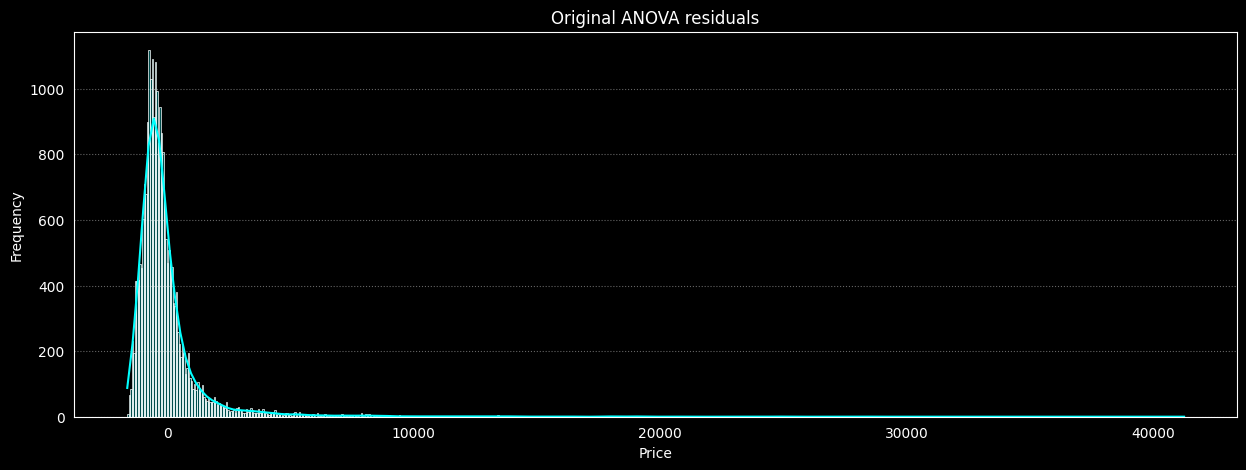

In [96]:
# Normalidad de residuos
residuals = model.resid
plt.figure(figsize=(15, 5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
sns.histplot(residuals, kde=True, edgecolor='white', linewidth=0.5, alpha=0.3, color='cyan',)
plt.title('Original ANOVA residuals', color='white')
plt.xlabel('Price', color='white')
plt.ylabel('Frequency', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
plt.grid(True, linestyle=':', color='white', alpha=0.4, axis='y')
plt.savefig('Original_ANOVA_residuals_distribution_2.png')
plt.show()

In [97]:
_, p_shapiro = shapiro(residuals)
print(f"Shapiro-Wilk p-value: {p_shapiro:.4f}")

Shapiro-Wilk p-value: 0.0000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23640.



In [98]:
# Transformación logarítmica
model_log = ols('logarithmic_price ~ C(neighbourhood)', data=df_ANOVA).fit()
print('\nANOVA con Log Price:\n', anova_lm(model_log))


ANOVA con Log Price:
                        df        sum_sq    mean_sq           F  PR(>F)
C(neighbourhood)     15.0   1362.788753  90.852584  175.865522     0.0
Residual          23624.0  12204.219499   0.516603         NaN     NaN


In [99]:
# Homocedasticidad
grupos = [df_ANOVA[df_ANOVA['neighbourhood'] == tipo]['price'] for tipo in df_ANOVA['neighbourhood'].unique()]
_, p_levene = levene(*grupos)
print(f"\nLevene p-value: {p_levene:.4f}")


Levene p-value: 0.0000


In [100]:
# Welch's ANOVA
if p_levene < 0.05:
    print("\nUsando Welch's ANOVA:")
    print(welch_anova(data=df_ANOVA, dv='price', between='neighbourhood'))


Usando Welch's ANOVA:
          Source  ddof1       ddof2          F          p-unc       np2
0  neighbourhood     15  790.982282  86.864818  1.222205e-155  0.026394


In [101]:
# Kruskal-Wallis
stat, p_kruskal = kruskal(*grupos)
print(f"\nKruskal-Wallis p-value: {p_kruskal:.4f}")


Kruskal-Wallis p-value: 0.0000


In [102]:
def plot_map_by_neighbourhood(df, neighbourhood, lat_col='latitude', lon_col='longitude',
                              color_col='price_category', hover_name_col='neighbourhood',
                              hover_data_cols=['price', 'room_type'], zoom=10):

    df_filtered = df[df['neighbourhood'] == neighbourhood]
    color_discrete_map = {
        'Low': '#FFA500',  # Naranja
        'Medium': '#FF4444',  # Rojo intenso
        'High': '#00FF00',  # Verde neón
        'Very_High': '#FFD700',   # Oro sólido
        'Luxury': '#00B4FF'  # Azul brillante
    }
    fig = px.scatter_mapbox(
        df_filtered,
        lat=lat_col,
        lon=lon_col,
        color=color_col,
        hover_name=hover_name_col,
        hover_data=hover_data_cols,
        mapbox_style='carto-darkmatter',  # Estilo oscuro
        zoom=zoom,
        title=f'<b>Price distribution in {neighbourhood}</b>',
        color_discrete_map=color_discrete_map,
        height=600
    )
    fig.update_layout(
        margin=dict(l=20, r=20, t=60, b=20),
        title_x=0.5,
        paper_bgcolor='rgba(0,0,0,1)',  # Fondo negro
        plot_bgcolor='rgba(0,0,0,1)',   # Fondo del mapa
        font=dict(color='white'),       # Color del texto
        legend=dict(
            bgcolor='rgba(30,30,30,0.8)',
            bordercolor='rgba(255,255,255,0.3)'
        )
    )
    fig.update_traces(
        marker=dict(
            size=8,
            opacity=0.8
        )
    )
    filename = f"Prices_in_{neighbourhood}.html"
    fig.write_html(
        filename,
        include_plotlyjs='cdn',
        full_html=False,
        config={'displayModeBar': False}
    )
    return fig

In [103]:
'''Cuajimalpa de Morelos', 'Cuauhtémoc', 'Coyoacán',
'Miguel Hidalgo', 'Benito Juárez', 'Tlalpan',
'Venustiano Carranza', 'Gustavo A. Madero', 'Xochimilco',
'La Magdalena Contreras', 'Álvaro Obregón', 'Azcapotzalco',
'Iztacalco', 'Iztapalapa', 'Tláhuac', 'Milpa Alta'''
plot_map_by_neighbourhood(df_temporal, 'Xochimilco')

In [104]:
demand=df_temporal.groupby('neighbourhood')[['number_of_reviews', 'availability_365']].mean()
demand['indice_demanda'] = (demand['number_of_reviews'] / demand['number_of_reviews'].max()) * (1 - demand['availability_365'] / 365)

In [105]:
demand

number_of_reviews  availability_365  indice_demanda
neighbourhood                                                              
Azcapotzalco                    44.164557        259.547468        0.159594
Benito Juárez                   39.208918        234.040273        0.175958
Coyoacán                        47.108774        243.894851        0.195502
Cuajimalpa de Morelos           34.556497        258.500000        0.126115
Cuauhtémoc                      56.505449        234.977756        0.251765
Gustavo A. Madero               35.358209        257.471215        0.130287
Iztacalco                       42.627072        242.939227        0.178299
Iztapalapa                      26.583732        263.105263        0.092823
La Magdalena Contreras          17.429825        266.798246        0.058654
Miguel Hidalgo                  46.916317        241.326092        0.198833
Milpa Alta                      10.227273        296.954545        0.023848
Tlalpan                         25.982196        242.821958        0.108782
Tláhuac                         15.511628        279.023256        0.045701
Venustiano Carranza             79.950301        226.001506        0.380818
Xochimilco                      17.050000        264.350000        0.058806
Álvaro Obregón                  28.507883        255.853604        0.106626

In [106]:
security_dict = {
    'Cuajimalpa de Morelos':0.37,
    'Cuauhtémoc':0.4,
    'Coyoacán':0.6,
    'Miguel Hidalgo':0.53,
    'Benito Juárez':0.8,
    'Tlalpan':0.46,
    'Venustiano Carranza':0.47,
    'Gustavo A. Madero':0.36,
    'Xochimilco':0.28,
    'La Magdalena Contreras':0.46,
    'Álvaro Obregón':0.6,
    'Azcapotzalco':0.54,
    'Iztacalco':0.46,
    'Iztapalapa':0.4,
    'Tláhuac':0.39,
    'Milpa Alta':0.57
}

In [107]:
security_dict

{'Cuajimalpa de Morelos': 0.37,
 'Cuauhtémoc': 0.4,
 'Coyoacán': 0.6,
 'Miguel Hidalgo': 0.53,
 'Benito Juárez': 0.8,
 'Tlalpan': 0.46,
 'Venustiano Carranza': 0.47,
 'Gustavo A. Madero': 0.36,
 'Xochimilco': 0.28,
 'La Magdalena Contreras': 0.46,
 'Álvaro Obregón': 0.6,
 'Azcapotzalco': 0.54,
 'Iztacalco': 0.46,
 'Iztapalapa': 0.4,
 'Tláhuac': 0.39,
 'Milpa Alta': 0.57}

In [108]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [109]:
df.drop(columns=['host_id', 'host_name', 'calculated_host_listings_count'], inplace=True)

In [110]:
df.head(3)

id                                              name  \
0  35797                                       Villa Dante   
2  67703                 2 bedroom apt. deco bldg, Condesa   
3  70644  Beautiful light Studio Coyoacan- full equipped !   

           neighbourhood  latitude  longitude        room_type   price  \
0  Cuajimalpa de Morelos  19.38382  -99.27334  Entire home/apt  3865.0   
2             Cuauhtémoc  19.41152  -99.16857  Entire home/apt  2029.0   
3               Coyoacán  19.35614  -99.16308  Entire home/apt  1140.0   

   minimum_nights  number_of_reviews  availability_365  
0               1                  0               363  
2               2                 49               325  
3               5                127               257

In [111]:
pip install pandas osmnx geopy tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 3.3 MB/s eta 0:00:00


In [112]:
import osmnx as ox
import geopandas as gpd

In [113]:
cdmx_neighbourhood = [
    'Cuajimalpa de Morelos', 'Cuauhtémoc', 'Coyoacán',
    'Miguel Hidalgo', 'Benito Juárez', 'Tlalpan',
    'Venustiano Carranza', 'Gustavo A. Madero', 'Xochimilco',
    'La Magdalena Contreras', 'Álvaro Obregón', 'Azcapotzalco',
    'Iztacalco', 'Iztapalapa', 'Tláhuac', 'Milpa Alta'
]
neighbourhood_limit = []
for neighbourhood in cdmx_neighbourhood:
    area = ox.geocode_to_gdf(f"{neighbourhood}, Ciudad de México, México")
    neighbourhood_limit.append(area)

limit_gdf = gpd.GeoDataFrame(pd.concat(neighbourhood_limit, ignore_index=True))

In [114]:
north = 19.5929  # Santa Fe
south = 19.0516  # Xochimilco
east = -98.9664  # Iztapalapa
west = -99.3516  # La Marquesa

bbox = (north, south, east, west)

In [115]:
cdmx = ox.geocode_to_gdf("Ciudad de México, México", which_result=1)
bbox_polygon = cdmx.geometry.iloc[0]
tags_supermarket = {"shop": "supermarket"}
tags_hospital = {"amenity": "hospital"}
tags_university = {"amenity": "university"}
tags_subway = {"railway": "station", "station": "subway"}
tags_park = {"leisure": "park"}
tags_restaurant = {"amenity": "restaurant"}

def descargar_pois(tags):
    gdf = ox.features_from_polygon(bbox_polygon, tags=tags)
    return gdf[gdf.geometry.type == "Point"]

supermarket = descargar_pois(tags_supermarket)
hospital = descargar_pois(tags_hospital)
university = descargar_pois(tags_university)
subway = descargar_pois(tags_subway)
park = descargar_pois(tags_park)
restaurant = descargar_pois(tags_restaurant)

In [116]:
print(f"supermarket: {len(supermarket)}")
print(f"hospital: {len(hospital)}")
print(f"university: {len(university)}")
print(f"subway: {len(subway)}")
print(f"park: {len(park)}")
print(f"restaurant: {len(restaurant)}")

supermarket: 319
hospital: 113
university: 79
subway: 192
park: 73
restaurant: 2441


In [117]:
parques_proj = park.to_crs("EPSG:6372")
parques_proj["geometry"] = parques_proj.geometry.centroid
park = parques_proj.to_crs("EPSG:4326")

In [118]:
park.head(1)

geometry leisure  \
element id                                              
node    961346859  POINT (-99.17884 19.34224)    park   

                                      name description addr:city  \
element id                                                         
node    961346859  Parque Cerro Dos Conejo         NaN       NaN   

                  addr:postcode addr:street amenity backrest playground  ...  \
element id                                                               ...   
node    961346859           NaN         NaN     NaN      NaN        NaN  ...   

                  short_name survey:date area bicycle opening_hours:covid19  \
element id                                                                    
node    961346859        NaN         NaN  NaN     NaN                   NaN   

                  name:fr name:pt name:ru addr:neighbourhood type  
element id                                                         
node    961346859     NaN     NaN     NaN                NaN  NaN  

[1 rows x 70 columns]

In [119]:
supermarket_per_neighbourhoodo = gpd.sjoin(supermarket, limit_gdf, how="left", predicate="within")
hospital_per_neighbourhood = gpd.sjoin(hospital, limit_gdf, how="left", predicate="within")
university_per_neighbourhood = gpd.sjoin(university, limit_gdf, how="left", predicate="within")
subway_per_neighbourhood = gpd.sjoin(subway, limit_gdf, how="left", predicate="within")
park_per_neighbourhood = gpd.sjoin(park, limit_gdf, how="left", predicate="within")
restaurant_per_neighbourhood = gpd.sjoin(restaurant, limit_gdf, how="left", predicate="within")

In [120]:
supermarket_per_neighbourhoodo.columns

Index(['geometry', 'branch', 'brand', 'brand:wikidata', 'name_left', 'shop',
       'addr:housenumber', 'addr:postcode', 'addr:street', 'brand:wikipedia',
       'phone', 'wheelchair', 'toilets:wheelchair', 'operator', 'name:ru',
       'opening_hours', 'addr:city', 'fixme', 'designation', 'source',
       'website', 'name:es', 'addr:state', 'payment:american_express',
       'payment:cash', 'payment:coins', 'payment:credit_cards',
       'payment:debit_cards', 'payment:mastercard', 'payment:notes',
       'payment:telephone_cards', 'payment:visa', 'addr:country', 'type_left',
       'addr:district', 'addr:suburb', 'organic', 'internet_access', 'level',
       'alt_name', 'name:en', 'addr:housename', 'note', 'description',
       'addr:unit', 'barrier', 'payment:cards', 'survey:date', 'amenity',
       'building', 'building:levels', 'building:levels:underground', 'toilets',
       'toilets:access', 'nohousenumber', 'landuse', 'height', 'short_name',
       'stroller', 'layer', 'smoking

In [121]:
from sklearn.neighbors import BallTree

In [122]:
def calcular_conteos(airbnb_gdf, pois_gdf, radio_km=2):
    airbnb_coords = np.deg2rad(airbnb_gdf[["latitude", "longitude"]].values)
    pois_coords = np.deg2rad(pois_gdf[["lat", "lon"]].values)  # Asegurar nombres de columnas
    tree = BallTree(pois_coords, metric="haversine")
    conteos = tree.query_radius(airbnb_coords, r=radio_km/6371, count_only=True)
    return conteos

df_temporal["supermarket"] = calcular_conteos(df_temporal, supermarket_per_neighbourhoodo)
df_temporal["hospital"] = calcular_conteos(df_temporal, hospital_per_neighbourhood)
df_temporal["university"] = calcular_conteos(df_temporal, university_per_neighbourhood)
df_temporal["subway"] = calcular_conteos(df_temporal, subway_per_neighbourhood)
df_temporal["restaurant"] = calcular_conteos(df_temporal, park_per_neighbourhood)
df_temporal["park"] = calcular_conteos(df_temporal, restaurant_per_neighbourhood)

In [123]:
df_temporal[df_temporal['neighbourhood']=='Coyoacán']

id                                              name  \
3                    70644  Beautiful light Studio Coyoacan- full equipped !   
27                  326296                  WONDERFUL ROOM IN COYOACAN HOUSE   
30                  331030   Rento Recámara, Baño privado, Coyoacán Conchita   
34                  386265       Room colonial, green, Coyoacán (Women only)   
101                1013504                   OASIS IN COYOACAN, SHARED HOUSE   
...                    ...                                               ...   
26504  1248341975554147258                        Estadio  azteca muy cómodo   
26529  1249499499176111456                        Master Suite King / Rivera   
26530  1249516887139276832                              Suite Doble /Trotsky   
26534  1249581624045027140                              Suite King / Quevedo   
26535  1249604763721853793                            Habitación King / Novo   

         host_id host_name neighbourhood   latitude  longitude  \
3         212109    Trisha      Coyoacán  19.356140 -99.163080   
27       1664327   Edoardo      Coyoacán  19.340340 -99.183450   
30       1688597      Emma      Coyoacán  19.345490 -99.158720   
34       1933252    Esther      Coyoacán  19.342400 -99.154190   
101      1664327   Edoardo      Coyoacán  19.340340 -99.183450   
...          ...       ...           ...        ...        ...   
26504  118952711     Eliza      Coyoacán  19.307970 -99.163680   
26529  651009137      Alfa      Coyoacán  19.349052 -99.172656   
26530  651009137      Alfa      Coyoacán  19.350800 -99.172850   
26534  651009137      Alfa      Coyoacán  19.349427 -99.174512   
26535  651009137      Alfa      Coyoacán  19.350200 -99.174580   

             room_type   price  minimum_nights  ...  \
3      Entire home/apt  1140.0               5  ...   
27        Private room   552.0               2  ...   
30        Private room  1300.0               2  ...   
34        Private room   324.0               4  ...   
101       Private room   384.0               3  ...   
...                ...     ...             ...  ...   
26504  Entire home/apt  2500.0               1  ...   
26529     Private room  5600.0               1  ...   
26530     Private room  5400.0               1  ...   
26534     Private room  5200.0               1  ...   
26535     Private room  4900.0               1  ...   

       calculated_host_listings_count  availability_365  price_category  \
3                                   3               257          Medium   
27                                  2               266          Medium   
30                                  2               363          Medium   
34                                  1               267             Low   
101                                 2               292             Low   
...                               ...               ...             ...   
26504                               1               364            High   
26529                               5               365       Very_High   
26530                               5               365       Very_High   
26534                               5               365       Very_High   
26535                               5               365       Very_High   

      logarithmic_price  supermarket  hospital  university  subway  \
3              7.039660           51        25          56      44   
27             6.315358            0         0           0       0   
30             7.170888           24        12          53      17   
34             5.783825           24        12          53      17   
101            5.953243            0         0           0       0   
...                 ...          ...       ...         ...     ...   
26504          7.824446            0         0           0       0   
26529          8.630700           24        12          53      17   
26530          8.594339           24        12          53      17   
26534   

In [124]:
def plot_neighbourhood_poi(df, neighbourhood, target,
                          lat_col='latitude', lon_col='longitude',
                          zoom=10, mapbox_style='carto-darkmatter',
                          color_scale='Plasma', radius=10,
                          center_auto=True, save_path=None):

    df_filtered = df[df['neighbourhood'] == neighbourhood].copy()
    center = {
        'lat': df_filtered[lat_col].mean(),
        'lon': df_filtered[lon_col].mean()
    } if center_auto else {'lat': 19.4326, 'lon': -99.1332}
    fig = px.density_mapbox(
        df_filtered,
        lat=lat_col,
        lon=lon_col,
        z=target,
        radius=radius,
        center=center,
        zoom=zoom,
        mapbox_style=mapbox_style,
        color_continuous_scale=color_scale,
        title=f'Density of {target} in {neighbourhood}',
        labels={target: 'Density'}
    )
    fig.update_layout(
        margin={'r':20,'t':60,'l':20,'b':20},
        paper_bgcolor='rgba(0,0,0,1)',
        plot_bgcolor='rgba(0,0,0,0.8)',
        font=dict(color='white', size=12),
        coloraxis_colorbar=dict(
            title='Intensity',
            tickcolor='white',
            title_font=dict(color='white')
        ),
        title_x=0.5,
        title_font=dict(size=16)
    )
    filename = f'Density_of_{target}_in_{neighbourhood}.html'
    fig.write_html(
        filename,
        include_plotlyjs='cdn',
        full_html=False,
        config={'displayModeBar': False}
    )
    return fig.show()

In [125]:
'''
Neighborhoods: Cuajimalpa de Morelos, Cuauhtémoc, Coyoacán Miguel, Hidalgo,
Benito Juárez, Tlalpan, Venustiano, Carranza, Gustavo A. Madero,
Xochimilco, La Magdalena, Contreras, Álvaro Obregón, Azcapotzalco,
Iztacalco, Iztapalapa, Tláhuac, Milpa Alta
POI: supermarket, hospital, university, subway, restaurant, park'''
plot_neighbourhood_poi(df_temporal, 'Cuauhtémoc', 'hospital')

In [126]:
def plot_poi(df, target, lat_col='latitude', lon_col='longitude', zoom=10, mapbox_style='carto-darkmatter',
             color_scale='Plasma', radius=10, center_auto=True, save_path=None):
    center = {
        'lat': df[lat_col].mean(),
        'lon': df[lon_col].mean()
    } if center_auto else {'lat': 19.4326, 'lon': -99.1332}
    fig = px.density_mapbox(
        df,
        lat=lat_col,
        lon=lon_col,
        z=target,
        radius=radius,
        center=center,
        zoom=zoom,
        mapbox_style=mapbox_style,
        color_continuous_scale=color_scale,
        title=f'Density of {target} in CDMX',
        labels={target: 'Density'}
    )
    fig.update_layout(
        margin={'r':20,'t':60,'l':20,'b':20},
        paper_bgcolor='rgba(0,0,0,1)',
        plot_bgcolor='rgba(0,0,0,0.8)',
        font=dict(color='white', size=12),
        coloraxis_colorbar=dict(
            title='Intensity',
            tickcolor='white',
            title_font=dict(color='white')
        ),
        title_x=0.5,
        title_font=dict(size=16)
    )
    filename =f'Density of {target} in CDMX.html'
    fig.write_html(
        filename,
        include_plotlyjs='cdn',
        full_html=False,
        config={'displayModeBar': False}
    )
    return fig.show()

In [127]:
'''POI: supermarket, hospital, university, subway, restaurant, park'''
plot_poi(df_temporal, 'supermarket')

In [128]:
security_dict

{'Cuajimalpa de Morelos': 0.37,
 'Cuauhtémoc': 0.4,
 'Coyoacán': 0.6,
 'Miguel Hidalgo': 0.53,
 'Benito Juárez': 0.8,
 'Tlalpan': 0.46,
 'Venustiano Carranza': 0.47,
 'Gustavo A. Madero': 0.36,
 'Xochimilco': 0.28,
 'La Magdalena Contreras': 0.46,
 'Álvaro Obregón': 0.6,
 'Azcapotzalco': 0.54,
 'Iztacalco': 0.46,
 'Iztapalapa': 0.4,
 'Tláhuac': 0.39,
 'Milpa Alta': 0.57}

In [129]:
demand = demand.reset_index()
demand = demand.set_index(["neighbourhood"])["indice_demanda"].round(2).to_dict()

In [130]:
demand

{'Azcapotzalco': 0.16,
 'Benito Juárez': 0.18,
 'Coyoacán': 0.2,
 'Cuajimalpa de Morelos': 0.13,
 'Cuauhtémoc': 0.25,
 'Gustavo A. Madero': 0.13,
 'Iztacalco': 0.18,
 'Iztapalapa': 0.09,
 'La Magdalena Contreras': 0.06,
 'Miguel Hidalgo': 0.2,
 'Milpa Alta': 0.02,
 'Tlalpan': 0.11,
 'Tláhuac': 0.05,
 'Venustiano Carranza': 0.38,
 'Xochimilco': 0.06,
 'Álvaro Obregón': 0.11}

In [131]:
income_per_month_dict = {
    'Cuajimalpa de Morelos':7755,
    'Cuauhtémoc':7148,
    'Coyoacán': 14177,
    'Miguel Hidalgo':6890,
    'Benito Juárez':6890,
    'Tlalpan':6357,
    'Venustiano Carranza':7197,
    'Gustavo A. Madero':6459,
    'Xochimilco':8453,
    'La Magdalena Contreras':5730,
    'Álvaro Obregón':6071,
    'Azcapotzalco':8249,
    'Iztacalco':6890,
    'Iztapalapa':6327,
    'Tláhuac':6890,
    'Milpa Alta':6890
}

In [132]:
average_cost_of_living_dict = {
    'Cuajimalpa de Morelos':16707,
    'Cuauhtémoc':12214,
    'Coyoacán':12214,
    'Miguel Hidalgo':14188,
    'Benito Juárez':17029,
    'Tlalpan':13000,
    'Venustiano Carranza':7000,
    'Gustavo A. Madero':8000,
    'Xochimilco':16000,
    'La Magdalena Contreras':16000,
    'Álvaro Obregón':12214,
    'Azcapotzalco':9346,
    'Iztacalco':7629,
    'Iztapalapa':16000,
    'Tláhuac':4780,
    'Milpa Alta':10000
}

In [133]:
neighbourhood_area_dict = {
    'Cuajimalpa de Morelos':78,
    'Cuauhtémoc':32.4,
    'Coyoacán':54.4,
    'Miguel Hidalgo':46.8,
    'Benito Juárez':26.6,
    'Tlalpan':311.5,
    'Venustiano Carranza':33.4,
    'Gustavo A. Madero':94.1,
    'Xochimilco':117.7,
    'La Magdalena Contreras':74.8,
    'Álvaro Obregón':96.3,
    'Azcapotzalco':33.3,
    'Iztacalco':23.3,
    'Iztapalapa':53.9,
    'Tláhuac':85.4,
    'Milpa Alta':268.4}

In [134]:
df_temporal['security_index'] = df_temporal['neighbourhood'].map(security_dict)
df_temporal['demand_index'] = df_temporal['neighbourhood'].map(demand)
df_temporal['income_per_month'] = df_temporal['neighbourhood'].map(income_per_month_dict)
df_temporal['average_cost_of_living'] = df_temporal['neighbourhood'].map(average_cost_of_living_dict)
df_temporal['neighbourhood_area'] = df_temporal['neighbourhood'].map(neighbourhood_area_dict)

In [135]:
df_temporal[['neighbourhood','security_index', 'demand_index']]

neighbourhood  security_index  demand_index
0      Cuajimalpa de Morelos            0.37          0.13
2                 Cuauhtémoc            0.40          0.25
3                   Coyoacán            0.60          0.20
4             Miguel Hidalgo            0.53          0.20
6             Miguel Hidalgo            0.53          0.20
...                      ...             ...           ...
26577         Miguel Hidalgo            0.53          0.20
26578         Miguel Hidalgo            0.53          0.20
26579         Miguel Hidalgo            0.53          0.20
26580         Miguel Hidalgo            0.53          0.20
26581             Cuauhtémoc            0.40          0.25

[23640 rows x 3 columns]

In [136]:
df_temporal["density_hospital"] = df_temporal["hospital"] / df_temporal["neighbourhood_area"]
df_temporal["density_supermarket"] = df_temporal["supermarket"] / df_temporal["neighbourhood_area"]
df_temporal["density_park"] = df_temporal["park"] / df_temporal["neighbourhood_area"]
df_temporal["density_university"] = df_temporal["university"] / df_temporal["neighbourhood_area"]
df_temporal["density_subway"] = df_temporal["subway"] / df_temporal["neighbourhood_area"]
df_temporal["density_restaurant"] = df_temporal["restaurant"] / df_temporal["neighbourhood_area"]

In [137]:
turistic_points_per_neighbourhood = {
    "Cuajimalpa de Morelos": (19.3110, -99.3026),      # Desierto de los Leones
    "Cuauhtémoc": (19.4352, -99.1412),                 # Palacio de Bellas Artes
    "Coyoacán": (19.3550, -99.1625),                   # Casa Azul de Frida Kahlo
    "Miguel Hidalgo": (19.4205, -99.1816),             # Castillo de Chapultepec
    "Benito Juárez": (19.3733, -99.1633),              # Parque de los Venados
    "Tlalpan": (19.2579, -99.1056),                    # Xochimilco
    "Venustiano Carranza": (19.4299, -99.1113),        # Mercado de Sonora
    "Gustavo A. Madero": (19.4846, -99.1173),          # Basílica de Guadalupe
    "Xochimilco": (19.2674, -99.0943),                 # Isla de las Muñecas
    "La Magdalena Contreras": (19.2314, -99.2737),     # Parque Nacional Los Dinamos
    "Álvaro Obregón": (19.3500, -99.2000),             # Santuario del Carmen
    "Azcapotzalco": (19.4894, -99.1886),               # Parque Tezozómoc
    "Iztacalco": (19.3958, -99.1017),                  # Iglesia de San Matías Apóstol
    "Iztapalapa": (19.3431, -99.0610),                 # Cerro de la Estrella
    "Tláhuac": (19.2869, -99.0058),                    # Laguna de Tláhuac
    "Milpa Alta": (19.1947, -99.0794)                  # Santuario del Señor de Chalma
}

In [138]:
from math import radians, sin, cos, sqrt, atan2
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [139]:
def dis_to_tourist_point_per_neighborhood(row):
    neighbourhood = row["neighbourhood"]
    if neighbourhood in turistic_points_per_neighbourhood:
        lat_punto, lon_punto = turistic_points_per_neighbourhood[neighbourhood]
        return haversine(row["latitude"], row["longitude"], lat_punto, lon_punto)
    else:
        return None

In [140]:
df_temporal["dis_to_tourist_point_per_neighborhood"] = df_temporal.apply(dis_to_tourist_point_per_neighborhood, axis=1)

In [141]:
df_temporal[["neighbourhood", "latitude", "longitude", "dis_to_tourist_point_per_neighborhood"]].head(3)

neighbourhood  latitude  longitude  \
0  Cuajimalpa de Morelos  19.38382  -99.27334   
2             Cuauhtémoc  19.41152  -99.16857   
3               Coyoacán  19.35614  -99.16308   

   dis_to_tourist_point_per_neighborhood  
0                               8.659602  
2                               3.895025  
3                               0.140610

In [142]:
from sklearn.cluster import KMeans

In [143]:
coords = df_temporal[["latitude", "longitude"]]

In [144]:
n_clusters = 16
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_temporal["cluster_geo"] = kmeans.fit_predict(coords)

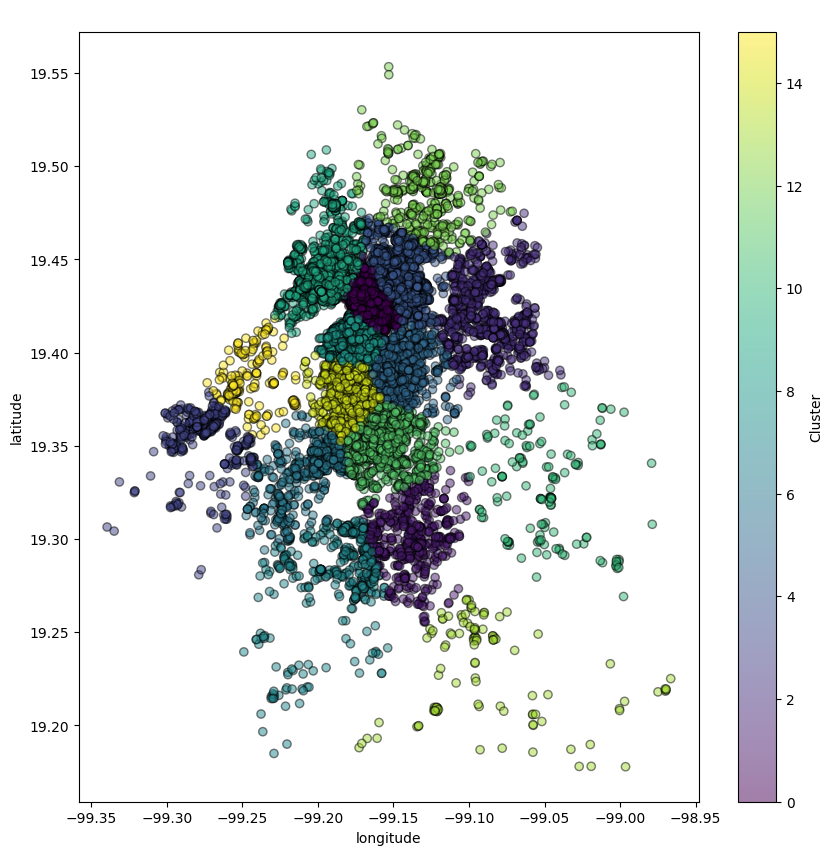

In [145]:
plt.figure(figsize=(10,10))
plt.scatter(df_temporal["longitude"], df_temporal["latitude"], c=df_temporal["cluster_geo"],
            cmap="viridis", alpha=0.5, edgecolors='k')
plt.colorbar(label="Cluster")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Clústers")
plt.savefig("clusters.png")
plt.show()

In [146]:
price_per_cluster = df_temporal.groupby("cluster_geo")["price"].mean().to_dict()
df_temporal["price_per_cluster"] = df_temporal["cluster_geo"].map(price_per_cluster)

In [147]:
df_temporal['disponibility_cat'] = pd.cut(
    df_temporal["availability_365"],
    bins=[0, 30, 180, np.inf],
    labels=["low", "medium", "high"])

In [148]:
df_temporal['disponibility_per_review']=df_temporal["availability_365"] * df_temporal["number_of_reviews"]

In [149]:
df_temporal["min_nights_cat"] = np.where(
    df_temporal["minimum_nights"] > 7, "long_term", "shor_term")

In [150]:
download_root = "https://raw.githubusercontent.com/CristianRiveraEsparza/MyBDCRE/main/"
airbnb = "AirBnB/meters_per_neighbourhood.csv"
df_meters_per_neigh = pd.read_csv(download_root + airbnb)

In [151]:
df_meters_per_neigh = df_meters_per_neigh.melt(
    id_vars=["neighbourhood"],
    value_vars=["Low", "Medium", "High", "Very_High", "Luxury"],
    var_name="price_range",
    value_name="average_measure")

In [152]:
df_meters_per_neigh

neighbourhood price_range average_measure
0   Cuajimalpa de Morelos         Low        20-30 m²
1              Cuauhtémoc         Low        25-35 m²
2                Coyoacán         Low        20-30 m²
3          Miguel Hidalgo         Low        30-40 m²
4           Benito Juárez         Low        25-35 m²
..                    ...         ...             ...
75           Azcapotzalco      Luxury         250+ m²
76              Iztacalco      Luxury         250+ m²
77             Iztapalapa      Luxury         200+ m²
78                Tláhuac      Luxury         500+ m²
79             Milpa Alta      Luxury         500+ m²

[80 rows x 3 columns]

In [153]:
df_temporal["average_measure"] = df_temporal.apply(
    lambda row: df_meters_per_neigh[
        (df_meters_per_neigh["neighbourhood"] == row["neighbourhood"]) &
        (df_meters_per_neigh["price_range"] == row["price_category"])
    ]["average_measure"].values[0], axis=1)

In [154]:
df_temporal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23640 entries, 0 to 26581
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     23640 non-null  int64   
 1   name                                   23640 non-null  object  
 2   host_id                                23640 non-null  int64   
 3   host_name                              23640 non-null  object  
 4   neighbourhood                          23640 non-null  object  
 5   latitude                               23640 non-null  float64 
 6   longitude                              23640 non-null  float64 
 7   room_type                              23640 non-null  object  
 8   price                                  23640 non-null  float64 
 9   minimum_nights                         23640 non-null  int64   
 10  number_of_reviews                      23640 non-null  int64   

In [155]:
df_final=df_temporal.copy()
df_final.to_csv('processed_aribnb_data.csv', index=False)

In [156]:
df_final.drop(columns=['id', 'host_id', 'name', 'host_name', 'calculated_host_listings_count', 'price_category',
                       'logarithmic_price'], inplace=True)

In [157]:
df_final.head(5)

neighbourhood  latitude  longitude        room_type   price  \
0  Cuajimalpa de Morelos  19.38382  -99.27334  Entire home/apt  3865.0   
2             Cuauhtémoc  19.41152  -99.16857  Entire home/apt  2029.0   
3               Coyoacán  19.35614  -99.16308  Entire home/apt  1140.0   
4         Miguel Hidalgo  19.43211  -99.19327  Entire home/apt  3633.0   
6         Miguel Hidalgo  19.40826  -99.18659  Entire home/apt  3671.0   

   minimum_nights  number_of_reviews  availability_365  supermarket  hospital  \
0               1                  0               363            0         0   
2               2                 49               325            0         0   
3               5                127               257           51        25   
4               1                 11               275            0         0   
6               2                357               230           32        10   

   ...  density_university  density_subway  density_restaurant  \
0  ...            0.000000        0.000000            0.000000   
2  ...            0.000000        0.000000            0.000000   
3  ...            1.029412        0.808824            0.220588   
4  ...            0.000000        0.000000            0.000000   
6  ...            0.000000        0.299145            0.128205   

   dis_to_tourist_point_per_neighborhood  cluster_geo  price_per_cluster  \
0                               8.659602           15        1454.504348   
2                               3.895025            8        1775.377953   
3                               0.140610           11        1029.543619   
4                               1.778827            9        1883.109571   
6                               1.458166            8        1775.377953   

   disponibility_cat  disponibility_per_review  min_nights_cat  \
0               high                         0       shor_term   
2               high                     15925       shor_term   
3               high                     32639       shor_term   
4               high                      3025       shor_term   
6               high                     82110       shor_term   

   average_measure  
0       150-250 m²  
2        90-150 m²  
3         40-60 m²  
4       250-400 m²  
6       250-400 m²  

[5 rows x 32 columns]

In [158]:
df_final.describe()

latitude     longitude         price  minimum_nights  \
count  23640.000000  23640.000000  23640.000000    23640.000000   
mean      19.406301    -99.166222   1430.318613        3.759729   
std        0.041710      0.032586   1909.565124       16.713203   
min       19.177848    -99.339630     50.000000        1.000000   
25%       19.393877    -99.178748    600.000000        1.000000   
50%       19.415610    -99.167519    999.000000        2.000000   
75%       19.432133    -99.154380   1561.000000        2.000000   
max       19.553380    -98.966450  42857.000000      730.000000   

       number_of_reviews  availability_365   supermarket      hospital  \
count       23640.000000      23640.000000  23640.000000  23640.000000   
mean           49.119332        239.169036     29.470601     10.482741   
std            77.859946        113.960088     79.646850     28.200821   
min             0.000000          0.000000      0.000000      0.000000   
25%             4.000000        145.000000      0.000000      0.000000   
50%            19.000000        268.000000      0.000000      0.000000   
75%            62.000000        343.000000     24.000000     10.000000   
max          1282.000000        365.000000    336.000000    115.000000   

         university        subway  ...  density_hospital  density_supermarket  \
count  23640.000000  23640.000000  ...      23640.000000         23640.000000   
mean       8.100127     17.502284  ...          0.316216             0.883150   
std       22.048320     48.180977  ...          0.872090             2.459994   
min        0.000000      0.000000  ...          0.000000             0.000000   
25%        0.000000      0.000000  ...          0.000000             0.000000   
50%        0.000000      0.000000  ...          0.000000             0.000000   
75%        0.000000     14.000000  ...          0.214592             0.648247   
max       79.000000    218.000000  ...          3.549383            10.370370   

       density_park  density_university  density_subway  density_restaurant  \
count  23640.000000        23640.000000    23640.000000        23640.000000   
mean       6.991871            0.230413        0.532971            0.205267   
std       18.954232            0.654716        1.490713            0.572363   
min        0.000000            0.000000        0.000000            0.000000   
25%        0.000000            0.000000        0.000000            0.000000   
50%        0.000000            0.000000        0.000000            0.000000   
75%        4.448529            0.000000        0.300300            0.147059   
max       77.345679            2.438272        6.728395            3.024691   

       dis_to_tourist_point_per_neighborhood   cluster_geo  price_per_cluster  \
count                           23640.000000  23640.000000       23640.000000   
mean                                2.984195      5.923816        1430.318613   
std                                 1.809901      4.320241         359.635415   
min                                 0.031174      0.000000         809.442266   
25%                                 1.788855      2.000000        1088.813333   
50%                                 2.778960      7.000000        1596.396252   
75%                                 3.825909      9.000000        1775.377953   
max                                15.341815     15.000000        1883.109571   

       disponibility_per_review  
count              23640.000000  
mean               11413.303215  
std                21178.273908  
min                    0.000000  
25%                  627.750000  
50%                 3450.000000  
75%                12852.000000  
max               389820.000000  

[8 rows x 27 columns]

In [159]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23640 entries, 0 to 26581
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   neighbourhood                          23640 non-null  object  
 1   latitude                               23640 non-null  float64 
 2   longitude                              23640 non-null  float64 
 3   room_type                              23640 non-null  object  
 4   price                                  23640 non-null  float64 
 5   minimum_nights                         23640 non-null  int64   
 6   number_of_reviews                      23640 non-null  int64   
 7   availability_365                       23640 non-null  int64   
 8   supermarket                            23640 non-null  int64   
 9   hospital                               23640 non-null  int64   
 10  university                             23640 non-null  int64   

In [160]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.8 MB/s eta 0:00:00


In [161]:
from category_encoders import TargetEncoder

In [162]:
def targetencoder(categorical_data):
  encoder = TargetEncoder()
  df_final[categorical_data]=encoder.fit_transform(df_final[categorical_data], df_final['price'])

In [163]:
variable=['neighbourhood','room_type', 'disponibility_cat', 'min_nights_cat','average_measure']
for i in variable:
  targetencoder(i)

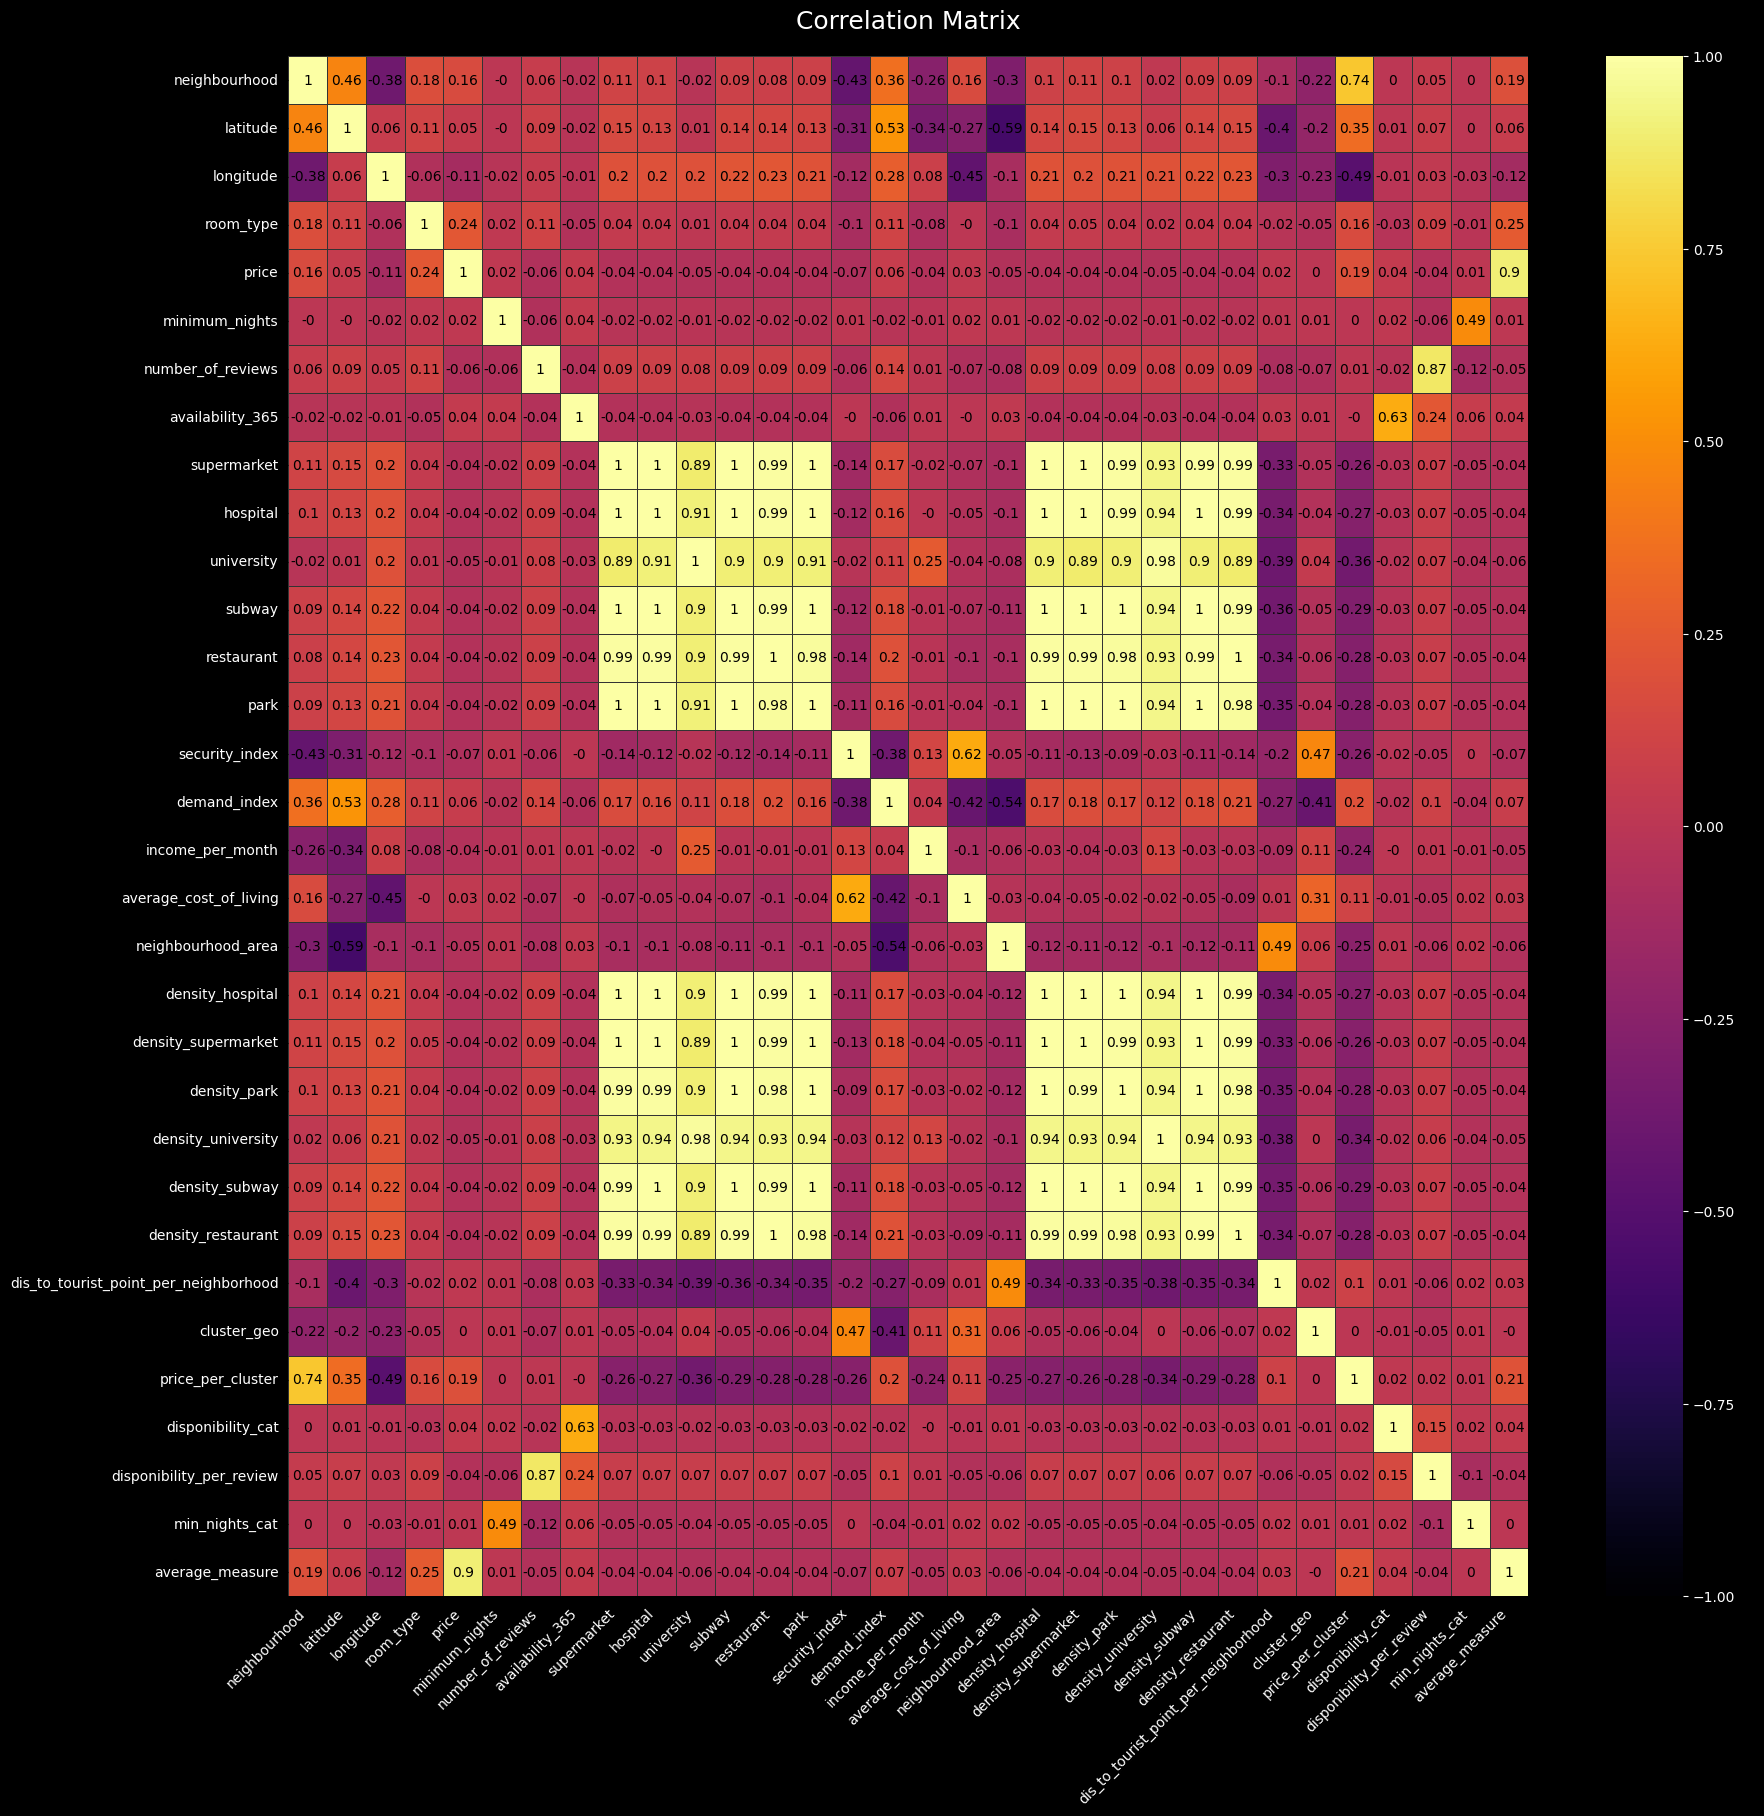

In [164]:
plt.figure(figsize=(20, 20), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
heatmap = sns.heatmap(
    df_final.corr().round(2),
    annot=True,
    cmap='inferno',
    annot_kws={'color': 'black', 'size': 10},
    linewidths=0.5,
    linecolor='#333333',
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Correlation Scale'}
)
plt.title('Correlation Matrix', color='white', fontsize=18, pad=20)
plt.xticks(color='white', rotation=45, ha='right')
plt.yticks(color='white', rotation=0)
cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='white')
cbar.outline.set_edgecolor('white')
plt.setp(cbar.ax.get_yticklabels(), color='white')
plt.savefig('correlation_matrix_dark.png')
plt.show()

In [165]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from xgboost import XGBRegressor, plot_importance

In [166]:
x=df_final.drop(['price'],axis=1)
y=np.log(df_final['price'])

In [167]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [168]:
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=1000, early_stopping_rounds=10,
        eval_metric="mae", random_state=42)

In [169]:
xgb_model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_val, y_val)], verbose=0)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [170]:
y_pred_log=xgb_model.predict(x_test)

In [171]:
y_pred=np.exp(y_pred_log)
y_true=np.exp(y_test)

In [172]:
print(f"MAE (Mean Absolute Error) the model has an error: {mean_absolute_error(y_true, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}")
print(f"R²: {r2_score(y_true, y_pred)}")
print(f"Mean Error: {np.mean(np.abs(y_true - y_pred)/y_true):.2%}")

MAE (Mean Absolute Error) the model has an error: 289.2385857060879
RMSE: 629.5856346198525
R²: 0.8787755811251686
Mean Error: 19.35%


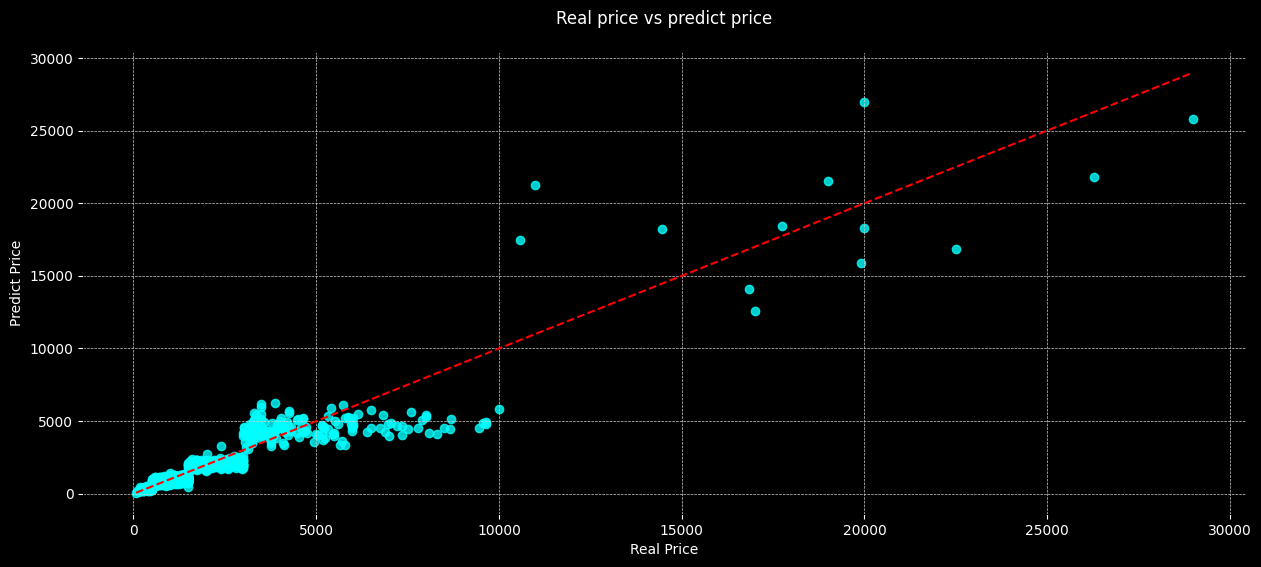

In [173]:
plt.figure(figsize=(15, 6), facecolor='black')
plt.gca().set_facecolor('black')
plt.scatter(y_true, y_pred, alpha=0.8, color='cyan')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "r--")
plt.xlabel("Real Price", color='white')
plt.ylabel("Predict Price", color='white')
plt.title("Real price vs predict price", color='white', pad=20)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.5)
plt.savefig('First_model_predictions.png')
plt.show()

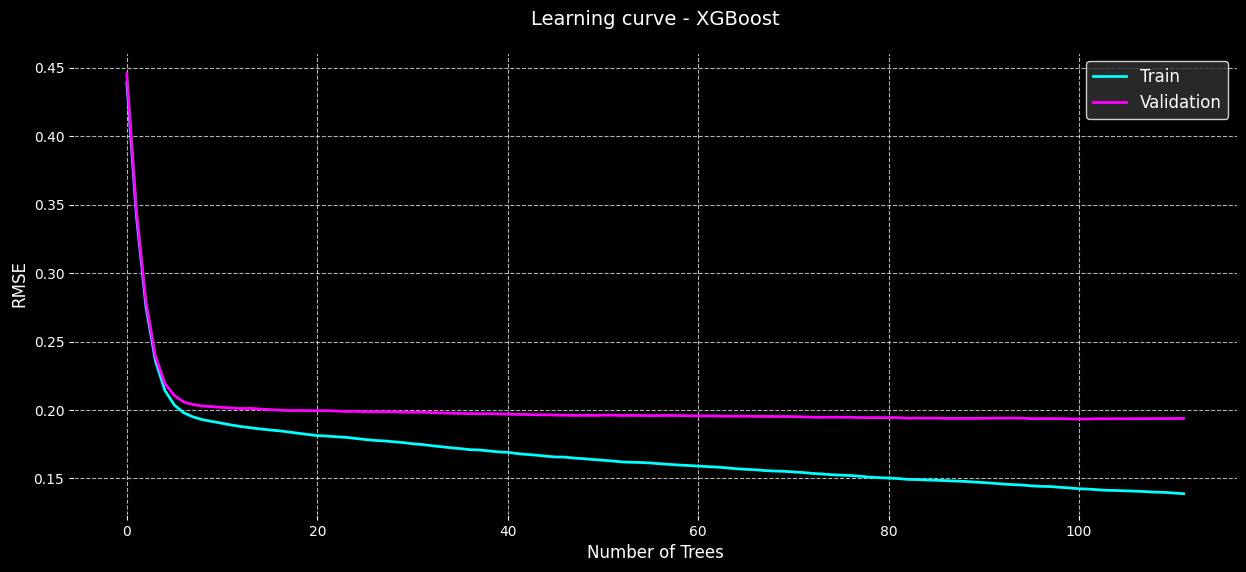

In [174]:
results = xgb_model.evals_result()
plt.figure(figsize=(15, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
plt.plot(results["validation_0"]["mae"], label="Train", color='cyan', linewidth=2)
plt.plot(results["validation_1"]["mae"], label="Validation", color='magenta', linewidth=2)
plt.xlabel("Number of Trees", color='white', fontsize=12)
plt.ylabel("RMSE", color='white', fontsize=12)
plt.title("Learning curve - XGBoost", color='white', fontsize=14, pad=20)
plt.tick_params(axis='both', colors='white')
plt.legend(facecolor='#333333', edgecolor='white', fontsize=12)
plt.grid(True, color='white', linestyle='--', alpha=0.7)
plt.savefig('learning_curve_first_model.png')
plt.show()

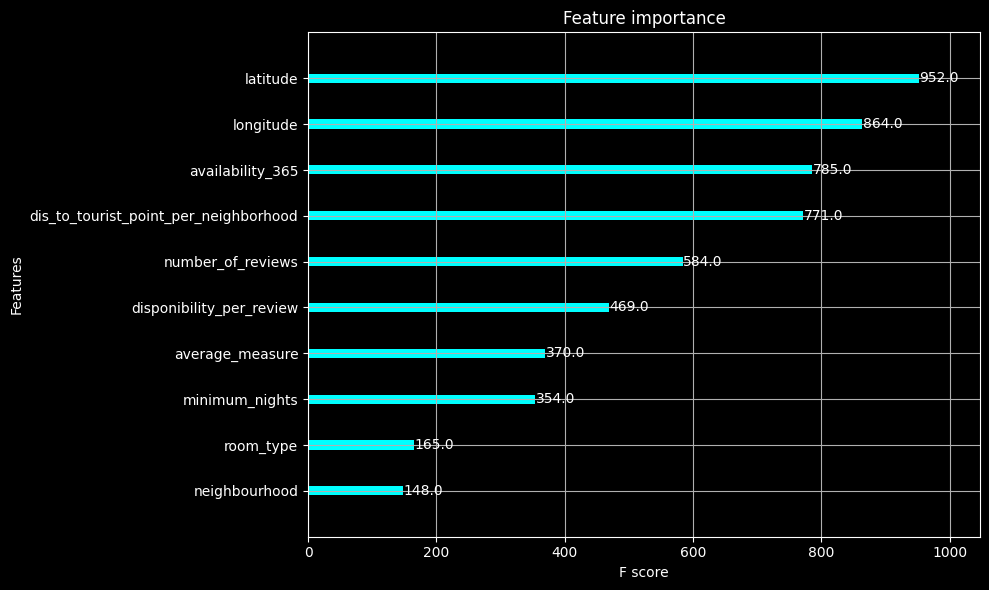

In [175]:
plt.figure(figsize=(10, 6), facecolor='black')
ax = plt.gca()
plot_importance(xgb_model, ax=ax, max_num_features=10, color='cyan')
ax.set_facecolor('black')
ax.tick_params(axis='both', colors='white')
ax.spines[:].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
plt.tight_layout()
plt.savefig('feature_importance_first_model.png')
plt.show()

In [176]:
from sklearn.pipeline import Pipeline

In [177]:
pipeline=Pipeline([
    ('scaler',RobustScaler()),
    ('pca',PCA(n_components=0.99)),
    ('xgb',XGBRegressor(objective='reg:squarederror', n_estimators=1000, random_state=42))
])

In [178]:
param_grid = {
    'xgb__learning_rate': [0.005, 0.01, 0.05, 0.1], # Taza de aprendizaje
    'xgb__max_depth': [3, 5, 7],                    # Profundidades de los arboles
    'xgb__subsample': [0.6, 0.8, 1.0],              # Datos con los que se alimentaran cada arbol
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],       # Fracciones de columnas a probar
    'xgb__gamma': [0, 0.1, 0.2],                    # Penalizacion a la creacion de arboles
    'xgb__reg_alpha': [0, 0.5, 1],                  # Penalizacion a la suma de los valores absolutos de los pesos
    'xgb__reg_lambda': [0, 0.5, 1],                 # Penalizacion a la suma de los valores cuadrados de los pesos
}

In [179]:
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,  # Validación cruzada
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2)

In [180]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                             ('pca', PCA(n_components=0.99)),
                                             ('xgb',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           g...
                                                           num_parallel_tree=None,
                                                           random_state=42, ...))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [0.6, 0.8,
                                                                  1.0],
                                        'xgb__gamma': [0, 0.1, 0.2],
                                        'xgb__learning_rate': [0.005, 0.01,
                                                               0.05, 0.1],
                                        'xgb__max_depth': [3, 5, 7],
                                        'xgb__reg_alpha': [0, 0.5, 1],
                                        'xgb__reg_lambda': [0, 0.5, 1],
                                        'xgb__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [181]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_
print(f"Better parameters: {best_params}")
print(f"Better RMSE: {np.sqrt(-random_search.best_score_)}")

Better parameters: {'xgb__subsample': 0.6, 'xgb__reg_lambda': 0.5, 'xgb__reg_alpha': 0, 'xgb__max_depth': 7, 'xgb__learning_rate': 0.05, 'xgb__gamma': 0, 'xgb__colsample_bytree': 1.0}
Better RMSE: 0.444915963754111


In [182]:
best_xgb_model = Pipeline([
    ("scaler", RobustScaler()),
    ("pca", PCA(n_components=0.99)),
    ("xgb", XGBRegressor(
        objective="reg:squarederror",
        random_state=42,
        early_stopping_rounds=20,
        eval_metric="mae",
        learning_rate=best_params["xgb__learning_rate"],
        max_depth=best_params["xgb__max_depth"],
        n_estimators=1000,
        subsample=best_params["xgb__subsample"],
        colsample_bytree=best_params["xgb__colsample_bytree"],
        gamma=best_params["xgb__gamma"],
        reg_alpha=best_params["xgb__reg_alpha"],
        reg_lambda=best_params["xgb__reg_lambda"]
    ))
])

In [183]:
x_val_transformed = best_model[:-1].transform(x_val)

In [184]:
x_train_transformed = best_model[:-1].transform(x_train)

In [185]:
best_xgb_model.fit(
    x_train, y_train,
    xgb__eval_set=[(x_train_transformed, y_train), (x_val_transformed, y_val)],
    xgb__verbose=0
)

Pipeline(steps=[('scaler', RobustScaler()), ('pca', PCA(n_components=0.99)),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1.0, device=None,
                              early_stopping_rounds=20,
                              enable_categorical=False, eval_metric='mae',
                              feature_types=None, gamma=0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [186]:
y_pred = np.exp(best_xgb_model.predict(x_test))
y_true = np.exp(y_test)

In [187]:
print("Pipeline Metrics:")
print(f"MAE: ${mean_absolute_error(y_true, y_pred):.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
print(f"R²: {r2_score(y_true, y_pred):.2%}")
print(f"Mean Error: {np.mean(np.abs(y_true - y_pred)/y_true):.2%}")

Pipeline Metrics:
MAE: $461.18
RMSE: $1082.14
R²: 64.19%
Mean Error: 35.33%


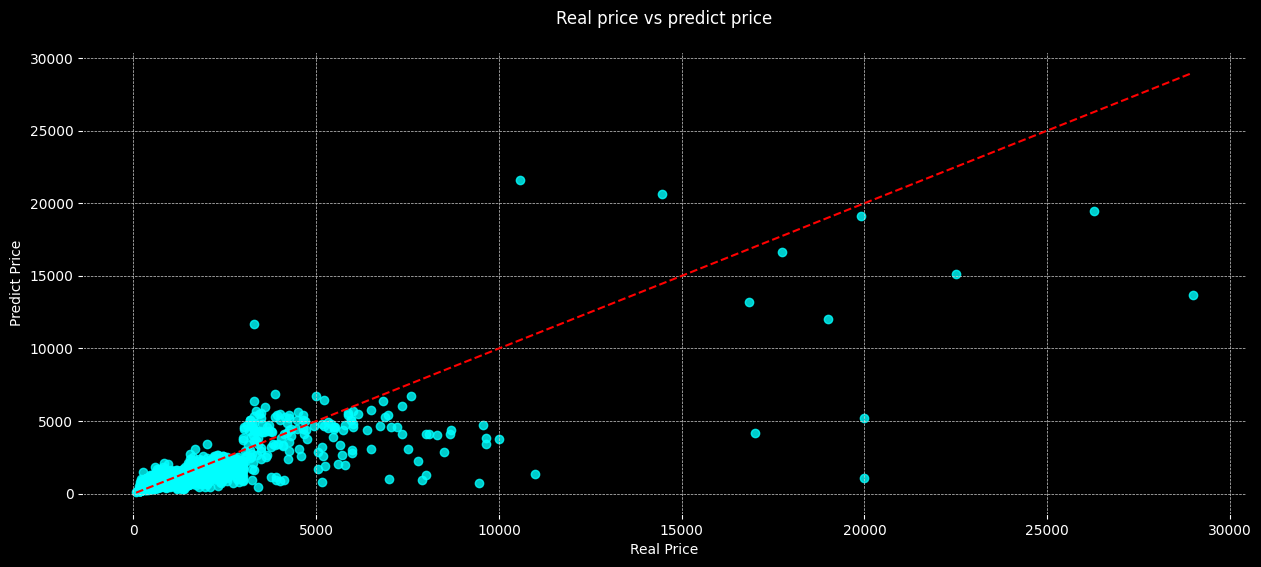

In [188]:
plt.figure(figsize=(15, 6), facecolor='black')
plt.gca().set_facecolor('black')
plt.scatter(y_true, y_pred, alpha=0.8, color='cyan')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "r--")
plt.xlabel("Real Price", color='white')
plt.ylabel("Predict Price", color='white')
plt.title("Real price vs predict price", color='white', pad=20)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.5)
plt.savefig('Pipeline_model_predictions.png')
plt.show()

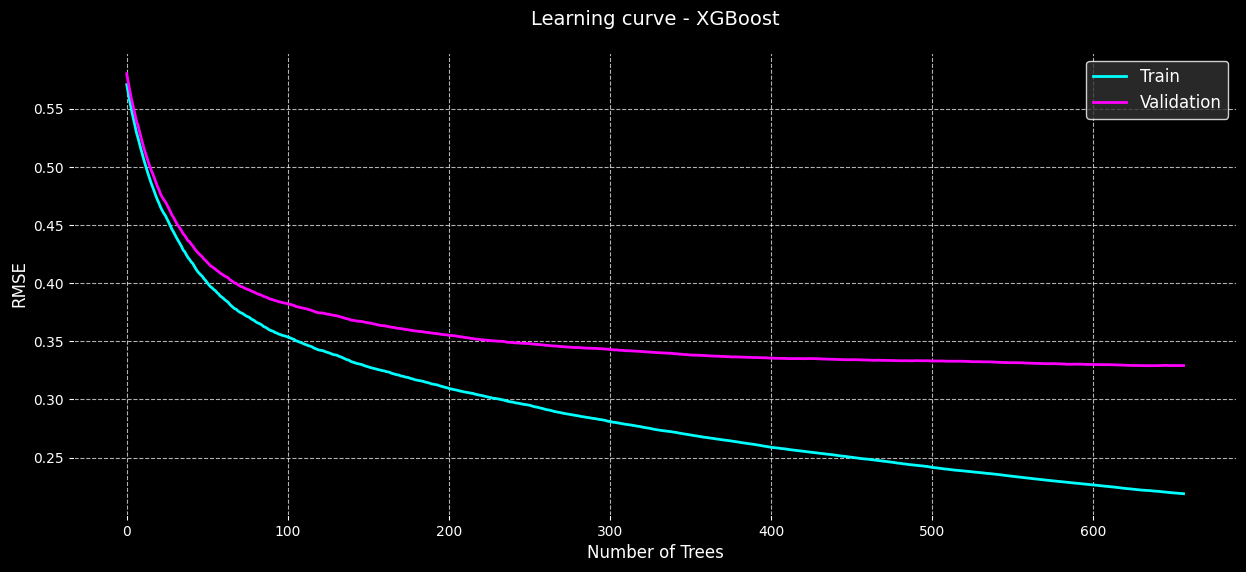

In [189]:
results = best_xgb_model.named_steps["xgb"].evals_result()
plt.figure(figsize=(15, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
plt.plot(results["validation_0"]["mae"], label="Train", color='cyan', linewidth=2)
plt.plot(results["validation_1"]["mae"], label="Validation", color='magenta', linewidth=2)
plt.xlabel("Number of Trees", color='white', fontsize=12)
plt.ylabel("RMSE", color='white', fontsize=12)
plt.title("Learning curve - XGBoost", color='white', fontsize=14, pad=20)
plt.tick_params(axis='both', colors='white')
plt.legend(facecolor='#333333', edgecolor='white', fontsize=12)
plt.grid(True, color='white', linestyle='--', alpha=0.7)
plt.savefig('pipeline_learning_curve.png')
plt.show()

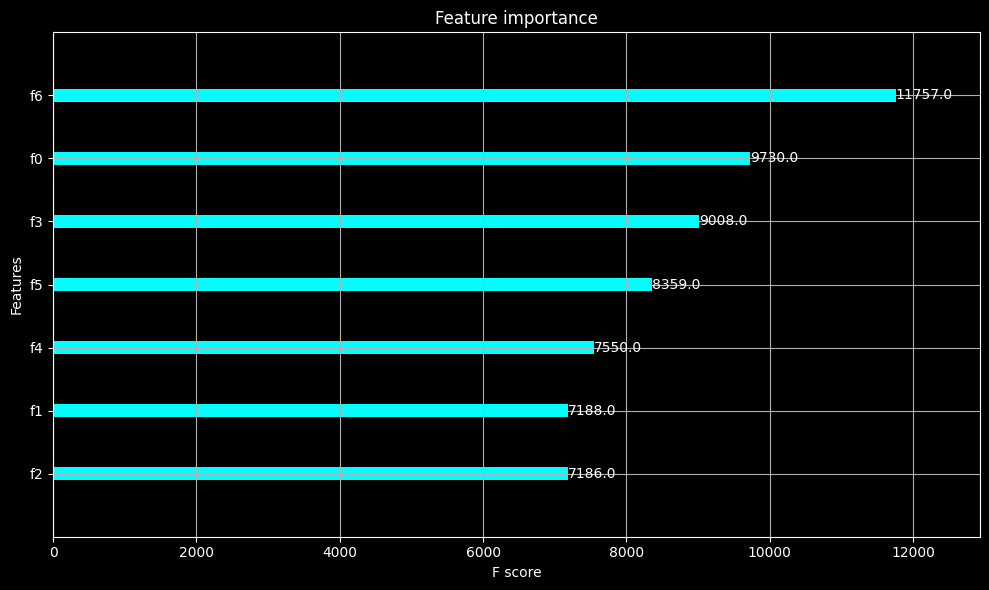

In [190]:
plt.figure(figsize=(10, 6), facecolor='black')
ax = plt.gca()
plot_importance(best_xgb_model.named_steps["xgb"], ax=ax, max_num_features=10, color='cyan')
ax.set_facecolor('black')
ax.tick_params(axis='both', colors='white')
ax.spines[:].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
plt.tight_layout()
plt.savefig('feature_importance_pipeline_model.png')
plt.show()

In [191]:
df_final.columns

Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'availability_365',
       'supermarket', 'hospital', 'university', 'subway', 'restaurant', 'park',
       'security_index', 'demand_index', 'income_per_month',
       'average_cost_of_living', 'neighbourhood_area', 'density_hospital',
       'density_supermarket', 'density_park', 'density_university',
       'density_subway', 'density_restaurant',
       'dis_to_tourist_point_per_neighborhood', 'cluster_geo',
       'price_per_cluster', 'disponibility_cat', 'disponibility_per_review',
       'min_nights_cat', 'average_measure'],
      dtype='object')

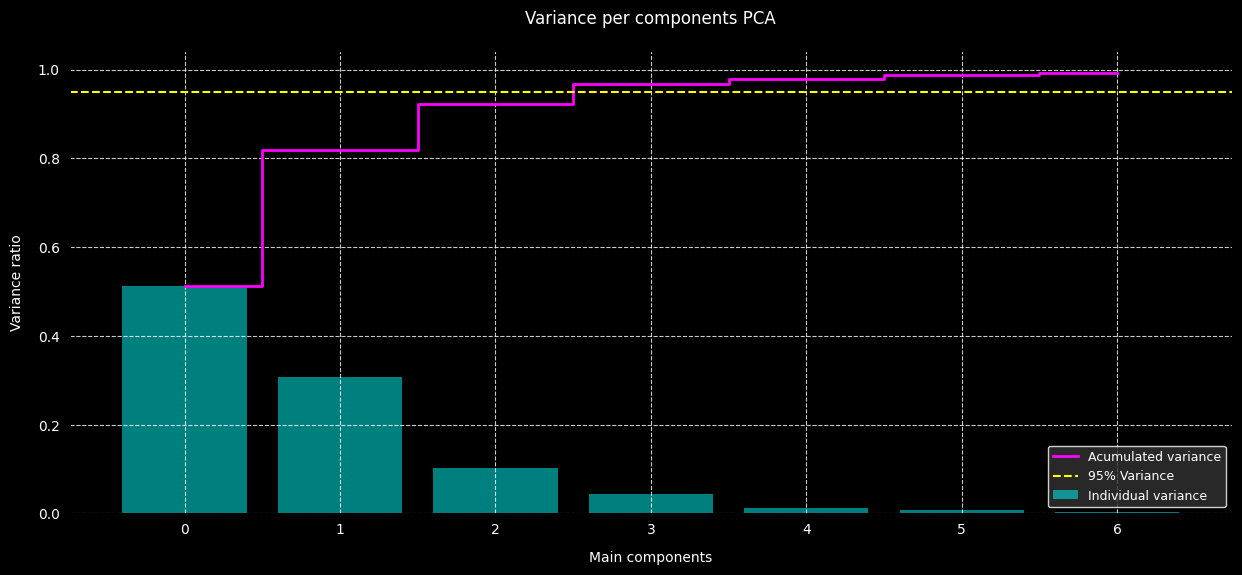

In [192]:
pca = best_xgb_model.named_steps["pca"]
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(15, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
plt.bar(range(len(explained_variance)), explained_variance,
        alpha=0.5, align='center',
        color='cyan', label='Individual variance')
plt.step(range(len(cumulative_variance)), cumulative_variance,
         where='mid', color='magenta',
         linewidth=2, label='Acumulated variance')
plt.axhline(y=0.95, color='yellow', linestyle='--', linewidth=1.5, label="95% Variance")
plt.title('Variance per components PCA', color='white', pad=20)
plt.xlabel('Main components', color='white', labelpad=10)
plt.ylabel('Variance ratio', color='white', labelpad=10)
plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(facecolor='#333333', edgecolor='white', fontsize=9)
plt.grid(True, color='white', linestyle='--', alpha=0.8)
plt.savefig('variance_pca.png', facecolor='black', bbox_inches='tight')
plt.show()

In [193]:
final_xgb_model=XGBRegressor(objective="reg:squarederror",
        random_state=42,
        early_stopping_rounds=10,
        eval_metric="mae",
        n_estimators=1000,)

In [194]:
final_xgb_model.set_params(nthread=1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None, nthread=1,
             num_parallel_tree=None, ...)

In [195]:
param_grid_new = {
    'learning_rate': [0.005, 0.01, 0.05, 0.1],  # Taza de aprendizaje
    'max_depth': [3, 5, 7],                     # Profundidades de los arboles
    'subsample': [0.6, 0.8, 1.0],               # Datos con los que se alimentaran cada arbol
    'colsample_bytree': [0.6, 0.8, 1.0],        # Fracciones de columnas a probar
    'gamma': [0, 0.1, 0.2],                     # Penalizacion a la creacion de arboles
    'reg_alpha': [0, 0.5, 1],                   # Penalizacion a la suma de los valores absolutos de los pesos
    'reg_lambda': [0, 0.5, 1],                  # Penalizacion a la suma de los valores cuadrados de los pesos
}

In [196]:
random_search_new = RandomizedSearchCV(
    estimator=final_xgb_model,
    param_distributions=param_grid_new,
    n_iter=50,
    cv=5,  # Validación cruzada
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2)

In [197]:
random_search_new.fit(
    x_train, y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)],
    verbose=0
)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=10,
                                          enable_categorical=False,
                                          eval_metric='mae', feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=N...
                                          n_estimators=1000, n_jobs=None,
                                          nthread=1, num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.005, 0.01, 0.05,
                                                          0.1],
                                        'max_depth': [3, 5, 7],
                                        'reg_alpha': [0, 0.5, 1],
                                        'reg_lambda': [0, 0.5, 1],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [198]:
best_params = random_search_new.best_params_
rarams_final_model = random_search_new.best_estimator_
print(f"Better parameters: {best_params}")
print(f"Better RMSE: {np.sqrt(-random_search.best_score_)}")

Better parameters: {'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 0, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Better RMSE: 0.444915963754111


In [199]:
xgb_final_model=XGBRegressor(objective="reg:squarederror",
        random_state=42,
        early_stopping_rounds=8,
        eval_metric="mae",
        learning_rate=0.01,
        max_depth=5,
        n_estimators=1000,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=0.2,
        reg_alpha=0.5,
        reg_lambda=1.0)

In [200]:
xgb_final_model.fit(
    x_train, y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)],
    verbose=0
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=8,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [201]:
y_pred = np.exp(xgb_final_model.predict(x_test))
y_true = np.exp(y_test)

In [202]:
print("XGB final Metrics:")
print(f"MAE: ${mean_absolute_error(y_true, y_pred):.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
print(f"R²: {r2_score(y_true, y_pred):.2%}")
print(f"Mean Error: {np.mean(np.abs(y_true - y_pred)/y_true):.2%}")

XGB final Metrics:
MAE: $298.47
RMSE: $668.27
R²: 86.34%
Mean Error: 20.25%


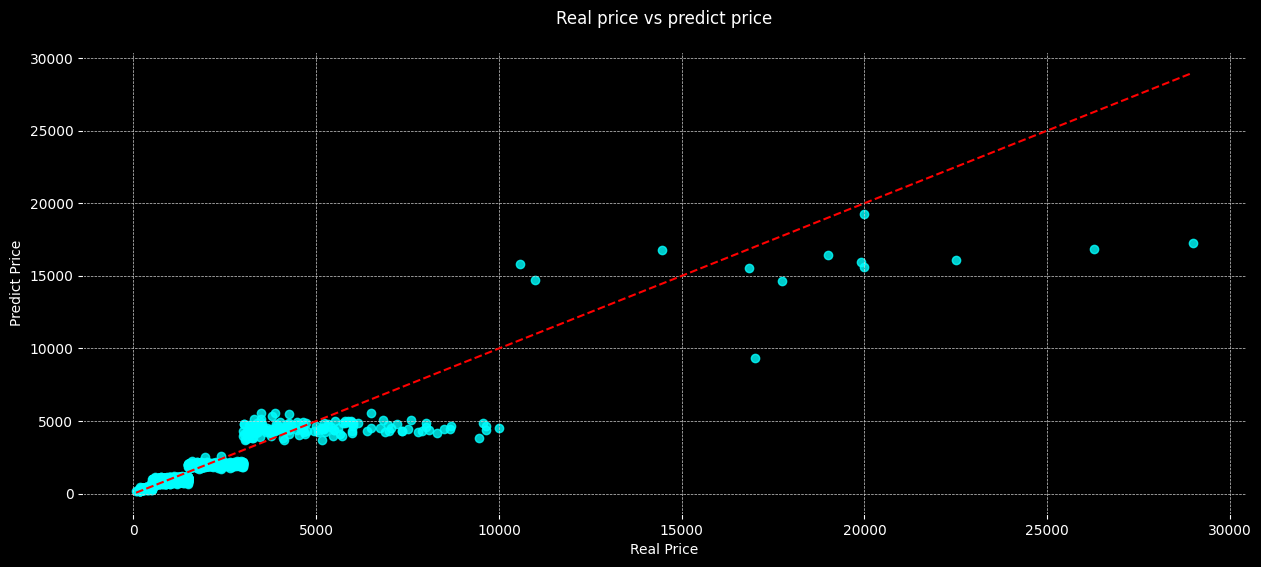

In [203]:
plt.figure(figsize=(15, 6), facecolor='black')
plt.gca().set_facecolor('black')
plt.scatter(y_true, y_pred, alpha=0.8, color='cyan')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "r--")
plt.xlabel("Real Price", color='white')
plt.ylabel("Predict Price", color='white')
plt.title("Real price vs predict price", color='white', pad=20)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.5)
plt.savefig('Final_model_predictions.png')
plt.show()

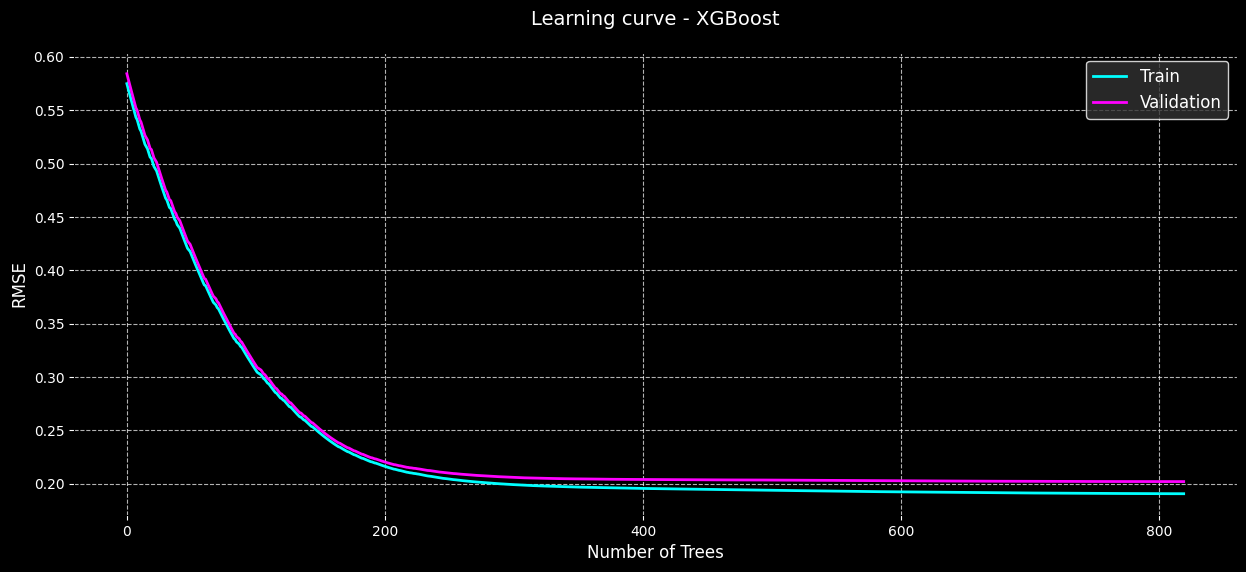

In [204]:
results = xgb_final_model.evals_result()
plt.figure(figsize=(15, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
plt.plot(results["validation_0"]["mae"], label="Train", color='cyan', linewidth=2)
plt.plot(results["validation_1"]["mae"], label="Validation", color='magenta', linewidth=2)
plt.xlabel("Number of Trees", color='white', fontsize=12)
plt.ylabel("RMSE", color='white', fontsize=12)
plt.title("Learning curve - XGBoost", color='white', fontsize=14, pad=20)
plt.tick_params(axis='both', colors='white')
plt.legend(facecolor='#333333', edgecolor='white', fontsize=12)
plt.grid(True, color='white', linestyle='--', alpha=0.7)
plt.savefig('learning_curve_final_model.png')
plt.show()

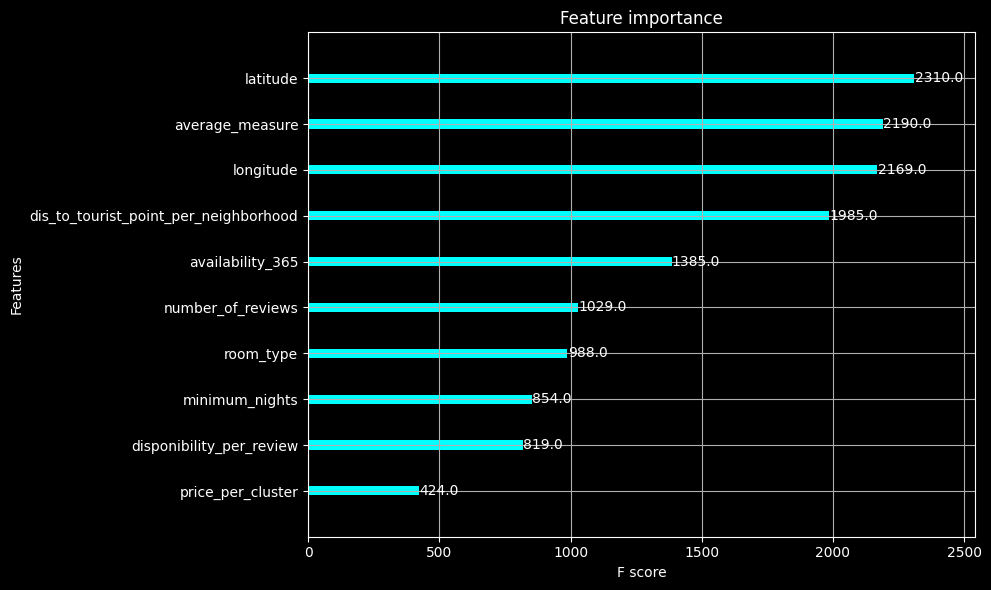

In [205]:
plt.figure(figsize=(10, 6), facecolor='black')
ax = plt.gca()
plot_importance(xgb_final_model, ax=ax, max_num_features=10, color='cyan')
ax.set_facecolor('black')
ax.tick_params(axis='both', colors='white')
ax.spines[:].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
plt.tight_layout()
plt.savefig('feature_importance_final_model.png')
plt.show()

In [206]:
from joblib import dump

In [207]:
dump(xgb_final_model, 'xgb_model.joblib')

['xgb_model.joblib']

In [208]:
from joblib import load

In [209]:
load_model = load('xgb_model.joblib')